In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from time import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Génération de matrices aléatoires

Ici, nous allons commencer par définir les 3 fonctions de génération de matrices aléatoires dont nous aurons besoin.

1. `matrice_test()` pour générer des matrices aléatoires d'une taille voulu qui définissent les liens éxistants entre les pages du web.
2. `norm_1()` pour normaliser un vecteur ou une matrice donné(e) en paramètre.
3. `matrice_Q()` pour normaliser les vecteurs colonnes d'une matrice donnée en paramètre pour que la somme de chaque colonne soit égale à 1.

In [2]:
def norm_1 (r) : 
    '''
    Norme 1: si x = (x1, x2, ... , xn), renvoie
    x1 + x2 + ... + xn
    
    @input:
    r -- numpy.array(int)
    
    @output:
    float: La norme 1 du vecteur ou de la matrice r
    '''
    return np.sum(np.abs(r))

def matrice_Q (C) :
    '''
    
    @input:
    C -- numpy array: matrice carré ne contenant que des
    1 et des 0, avec sa diagonale nulle
    
    @output:
    Rend la matrice Q tq r = Qr en partant de la matrice C.
    C'est-à-dire la matrice dont tous les coefs non nuls
    sont normalisés pour que la somme de chaque colone non
    nulle soit égale à 1
    
    @exemple:
    C:
    (0 1 0 0)     (0  1/2   0  0)
    (1 0 1 0)  -->(1   0   1/3 0)
    (0 0 1 0)     (0   0   1/3 0)
    (0 1 1 0)     (0  1/2  1/3 0)
    '''
    N = np.sum(C, axis = 0)
    Q = np.zeros(C.shape)
    for i in range(len(C)):
        for j in range(len(C)) :
            if N[j] == 0 :
                Q[i][j] = 0
            else :
                Q[i][j] = C[i][j]/N[j]
                
    return Q

def generate_matrix(n, f = lambda : random()):
    '''
    Matrice aléatoire dont les coeffs sont
    1 ou 0 et dont la diagonale est nulle
    
    @input:
    n -- int: taille de la matrice (carrée)
    f -- function void --> float: une fonction
    qui renvoie un float aléatoire entre 0 et 1,
    par defaut est une fonction uniforme
    
    @output:
    Matrice carrée de taille n dont les coeffs sont
    1 ou 0 et dont la diagonale est nulle
    '''
    assert n > 0
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i != j:
                r = f()
                if r < 0 or r > 1:
                    raise ValueError(f"Bornes de la fonction aléatoire incorrectes: {r}")
                elif f() > 0.5:
                    M[i][j] = 1
    return M

# Fonctions de test

Ici, nous définissons les fonctions que nous allons utiliser pour nos tests :

- `PageRank()`, qui est l'algorithme du PageRank standard.
- `AlgorithmePuissance()`, qui sera une alternative à `PageRank()`et dont nous allons essayer de déceler les différences avec cette dernière, s'il y en a.

In [3]:
def PageRank (C, alpha = 0.85, epsilon = 1.0e-4):
    '''
    Fonction d application de l'algorithme de Page Rank avec entrées :
    
    @input:
    C -- numpy.array(int): matrice carrée représentant sur les pointage des pages
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    epsilon -- float: seuil de tolerance 
    
    @output:
    r -- numpy.array(int): de taille 1xN tel que r[i] est score de la page i pour tout i dans {1, ... , N}
    où C est de taille NxN
    cpt -- int: nombre d'itérations
    R -- numpy.array(int): R[i] = score à la i-ème itération
    '''
    shape = C.shape
    if shape[0] != shape[1]:
        raise ValueError(f"Matrice C est de taille := {shape} pas carrée")
    N = shape[0]
    if alpha <= 0 or alpha >= 1:
        raise ValueError(f"Alpha := {alpha} non compris entre 0 et 1 exclus")
    Q = matrice_Q(C)
    s = epsilon + 10.0
    e = np.ones(N)
    np.random.seed(0)
    r = np.random.uniform(low=0.0, high=100.0, size=N)
    r = r/norm_1(r)
    R = []
    cpt = 0
    while s >= epsilon :
        r_chap = alpha * (np.dot(Q,r))
        beta = 1.0 - norm_1(r_chap)
        r_tild = r_chap + (beta / N) * e
        s = norm_1(r_tild - r)
        r = r_tild
        R.append(r)
        cpt += 1
    return r, cpt, np.array(R)

def AlgorithmePuissance (C,alpha = 0.85, epsilon = 1.0e-4):
    '''
    Fonction d'application de l'algorithme de Page Rank avec entrées :
    
    @input:
    C -- numpy.array(int): matrice carrée représentant sur les pointage des pages
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    epsilon -- float: seuil de tolerance 
    
    @output:
    r -- numpy.array(int): de taille 1xN tel que r[i] est score de la page i pour tout i dans {1, ... , N}
    où C est de taille NxN
    cpt -- int: nombre d'itérations
    R -- numpy.array(int): R[i] = score à la i-ème itération
    '''
    shape = C.shape
    if shape[0] != shape[1]:
        raise ValueError(f"Matrice C est de taille := {shape} pas carrée")
    N = shape[0]
    if alpha <= 0 or alpha >= 1:
        raise ValueError(f"Alpha := {alpha} non compris entre 0 et 1 exclus")
        
    Q = matrice_Q(C)
    Nj = np.sum(C, axis = 0)
    d =  np.zeros(N)
    d[Nj == 0] = 1
    e = np.ones(N)
    e.shape = (N,1)
    d.shape = (1,N)
    A = alpha * (Q + 1.0 / N * (e @ d)) + (1- alpha) *1.0 /N *(np.ones((N,N)))
    
    s = epsilon + 10.0
    np.random.seed(0)
    r = np.random.uniform(low=0.0, high=100.0, size=N)
    r = r/norm_1(r)
    R = []
    cpt = 0
    while s >= epsilon :
        r_tild = A @ r
        s = norm_1(r_tild - r)
        r = r_tild
        R.append(r)
        cpt += 1
    return r, cpt, np.array(R)

# Fonction d'itérations

Nous définissons la fonction `itérations()`, qui pourra construire des graphes de comparaison pour les deux fonctions/algorithmes précédemment définis en ce qui concerne le nombre d'itérations de chacun d'entre eux par rapport à la taille des matrices données.

In [4]:
def iterations(x, Pagerank = True, f = lambda : random(), affichage = True, alpha = 0.85):
    '''
    Montre le nombre d'iterations que prendre l'algo
    PageRank/Puissance sur des matrices aléatoires de
    taille i pour tout i dans l'array x
    
    @input:
    x -- numpy.array(int) : la liste des tailles matrices
    a evaluer
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    f -- fonction void-->float : la fonction aléatoire
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    y -- numpy.array(int) : y[i] = nombre d'itérations
    pour une matrice de taille x[i]
    
    print : matplotlib.figure -- Graphique
    '''
    
    y = np.zeros(len(x))
    for i, n in enumerate(x):
        if n <= 0:
            raise ValueError(f"Taille de matrice := {n} invalide")
        C = generate_matrix(n, f)
        if Pagerank:
            _, r,_ = PageRank(C, alpha = alpha)
        else:
            _, r,_ = AlgorithmePuissance(C, alpha = alpha)
        y[i]= r
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, y, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Nombre d'itérations par rapport à la taille des matrices")
        ax.set_xlabel('Taille Matrice')
        ax.set_ylabel("Nombre d'itérations")
        ax.legend()
    return y

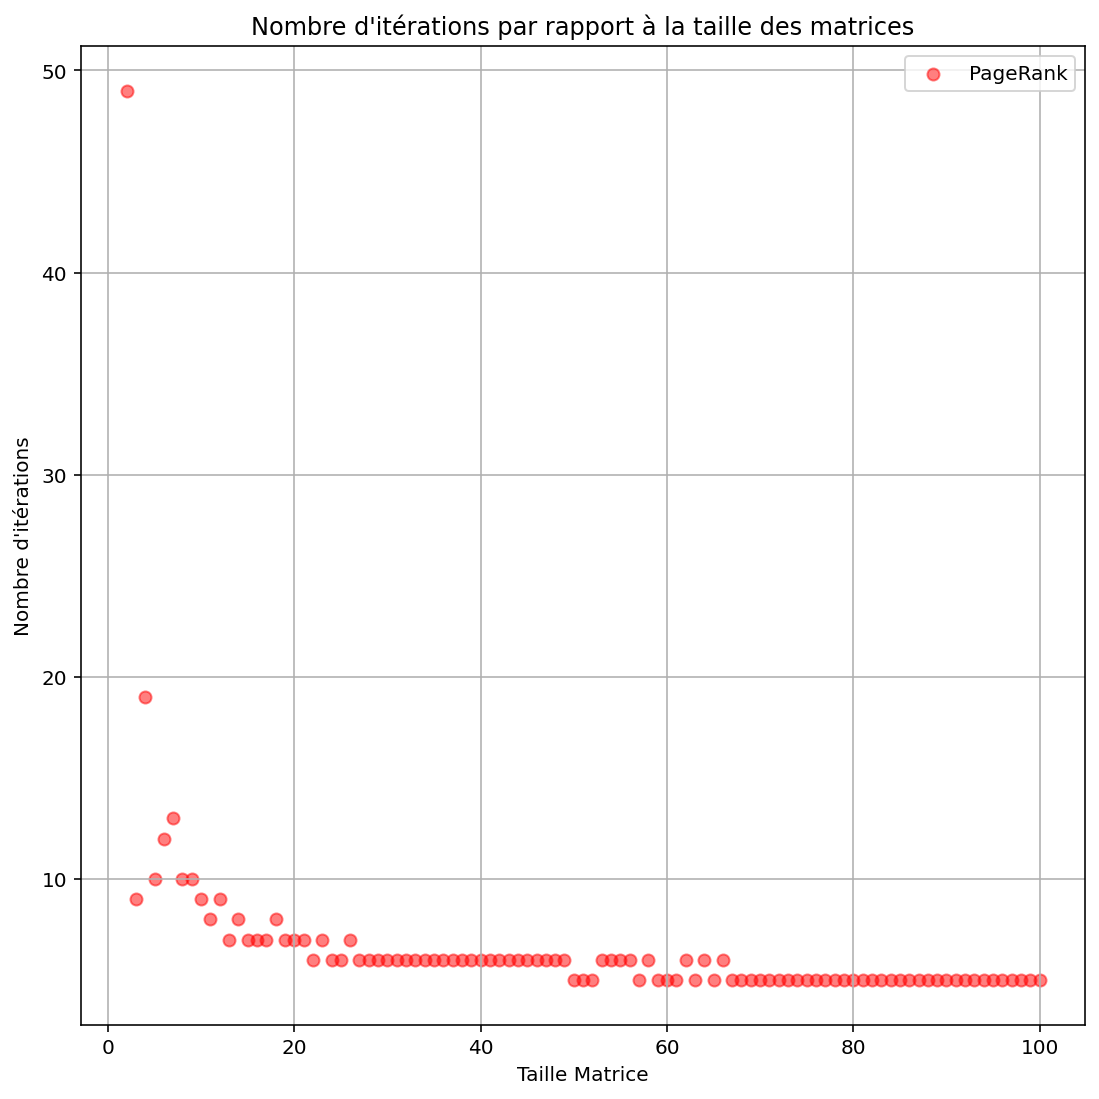

In [5]:
iterations(np.arange(2,101));

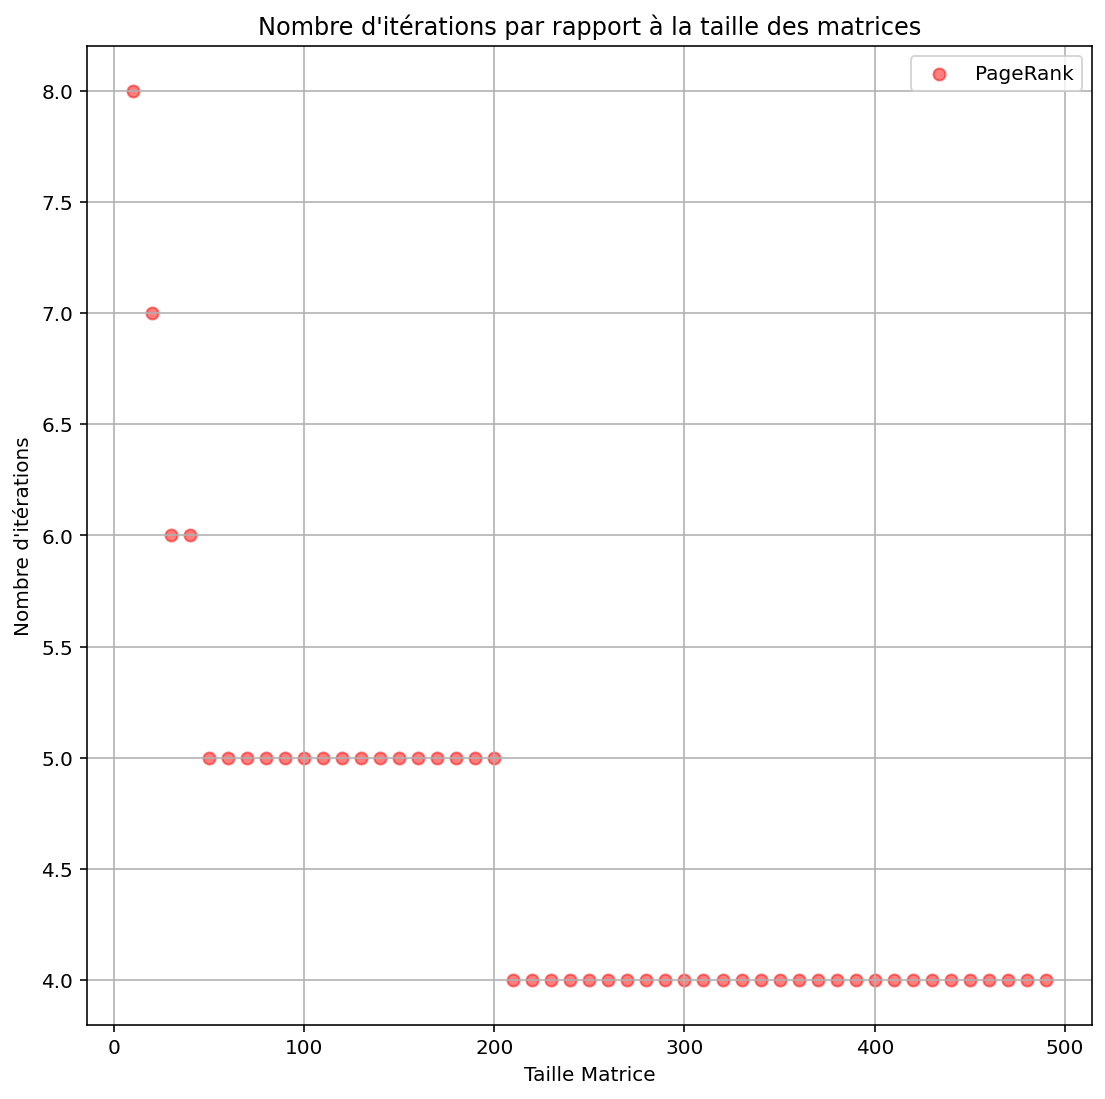

In [6]:
iterations(np.arange(10,500,10));

In [57]:
#iterations(np.arange(100,5000,500));

# Fonction de comparaison d'itérations

Nous définissons la fonction `comparaison_iter()`, qui pourra construire des graphes de comparaison des deux fonctions/algorithmes précédemment définis en ce qui concerne le nombre d'itérations de chacun d'entre eux par rapport à la taille des matrices données.

In [7]:
def comparaison_iter(x, f = lambda : random(), affichage = True, alpha = 0.85):
    '''
    Compare le temps que prendre l'algo 
    PageRank avec celui de puissance sur 
    des matrices aléatoires de
    taille i pour tout i dans l'array x
    
    @input:
    x -- numpy.array(int) : la liste des tailles matrices
    a evaluer
    f -- fonction void-->float : la fonction aléatoire
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    y1 -- numpy.array(int) : y1[i] = nombre di'itérations
    pour une matrice de taille x[i] avec PageRank
    y2 -- numpy.array(int) : y2[i] = nombre d'itérations
    pour une matrice de taille x[i] avec l'aglo de la Puissance
    
    print : matplotlib.figure -- Graphique
    '''
    
    start = 1
    stop = 100
    pas = 1
    y1, y2 = np.zeros(len(x)), np.zeros(len(x))
    for i, n in enumerate(x):
        C = generate_matrix(n, f)
        _, r1, _ = PageRank(C, alpha = alpha)
        _, r2, _ = AlgorithmePuissance(C, alpha = alpha)
        y1[i], y2[i] = r1, r2
        
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, y1, color = 'red', label='PageRank', alpha = 0.5)
        ax.scatter(x, y2, color = 'blue', label = 'Puissance', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Nombre d'itérations par rapport à la taille des matrices")
        ax.set_xlabel('Taille Matrice')
        ax.set_ylabel("Nombre d'itérations")
        ax.legend()
    return y1,y2

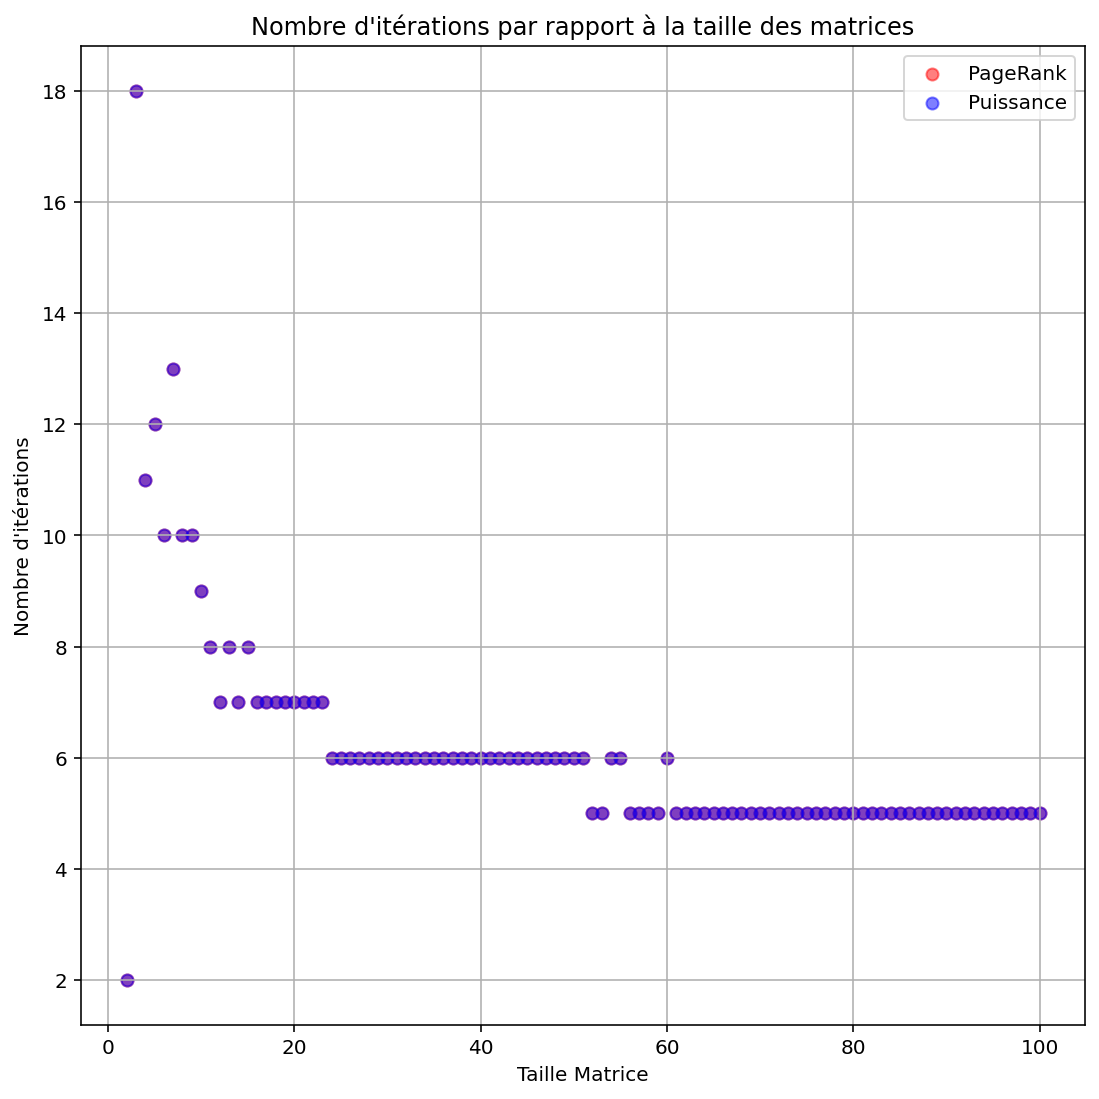

In [8]:
comparaison_iter(np.arange(2,101));

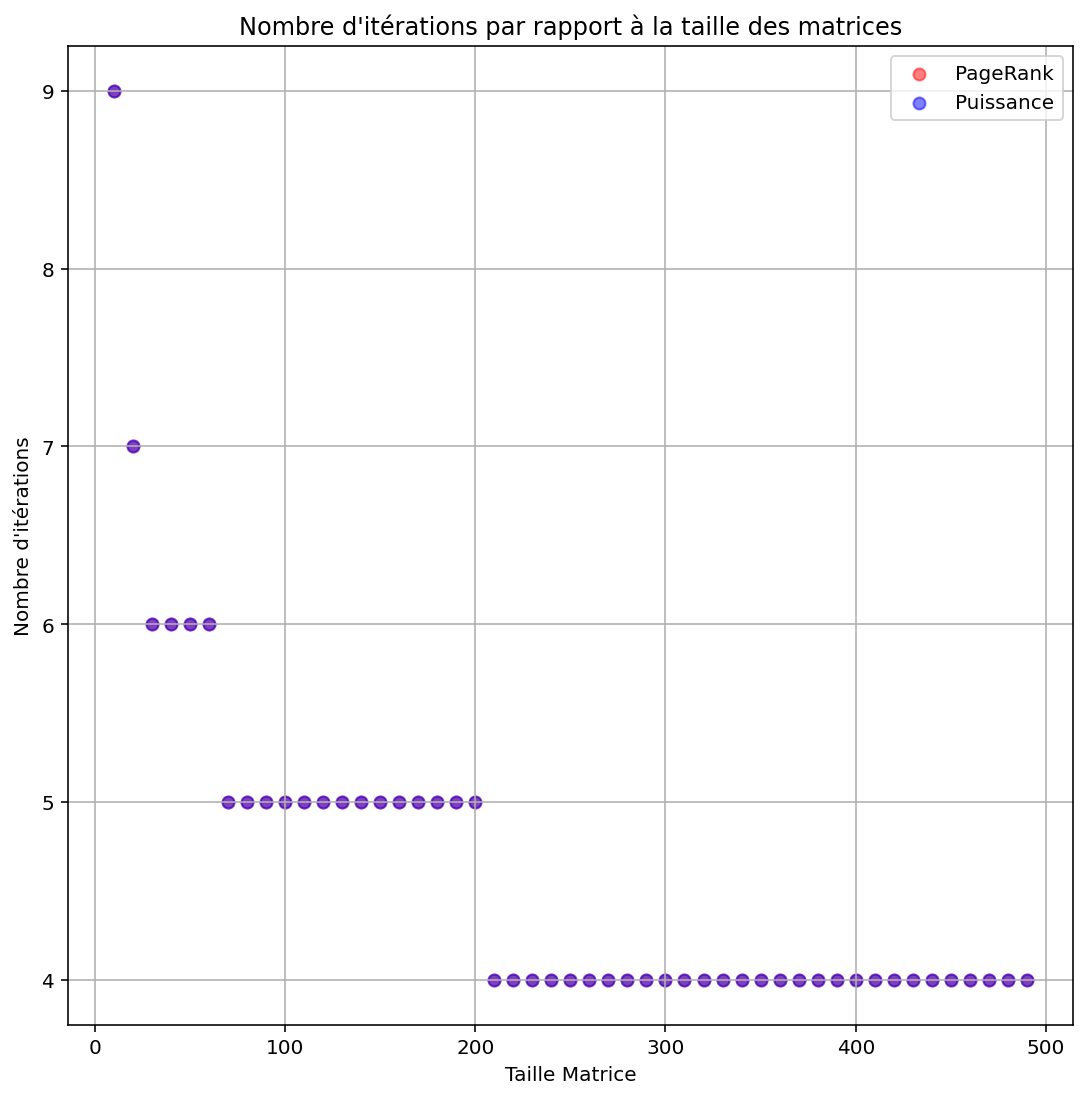

In [9]:
comparaison_iter(np.arange(10,500,10));

# Fonction d'itérations

Nous définissons la fonction `temps()`, qui pourra construire des graphes de comparaison pour les deux fonctions/algorithmes précédemment définis en ce qui concerne le temps d'éxectutions de chacun d'entre eux par rapport à la taille des matrices données.

In [10]:
def temps(x, Pagerank = True, f = lambda : random(), affichage = True, alpha = 0.85):
    '''
    Montre le temps que prendre l'algo 
    PageRank/Puissance sur des matrices aléatoires de
    taille i pour tout i dans l'array x
    
    @input:
    x -- numpy.array(int) : la liste des tailles matrices
    a evaluer
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    f -- fonction void-->float : la fonction aléatoire
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    y -- numpy.array(int) : y[i] = temps que l'algo a pris
    pour une matrice de taille x[i] avec PageRank
    
    print : matplotlib.figure -- Graphique
    '''
    
    y = np.zeros(len(x))
    for i, n in enumerate(x):
        if n <= 0:
            raise ValueError(f"Taille de matrice := {n} invalide")
        C = generate_matrix(n, f)
        if Pagerank:
            t1 = time()
            _, _, _ = PageRank(C, alpha = alpha)
            t2 = time()
        else:
            t1 = time()
            _, _, _ = AlgorithmePuissance(C, alpha = alpha)
            t2 = time()
        y[i]= t2 - t1
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, y, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Nombre d'itérations par rapport à la taille des matrices")
        ax.set_xlabel('Taille Matrice')
        ax.set_ylabel("Temps")
        ax.legend()
    return y

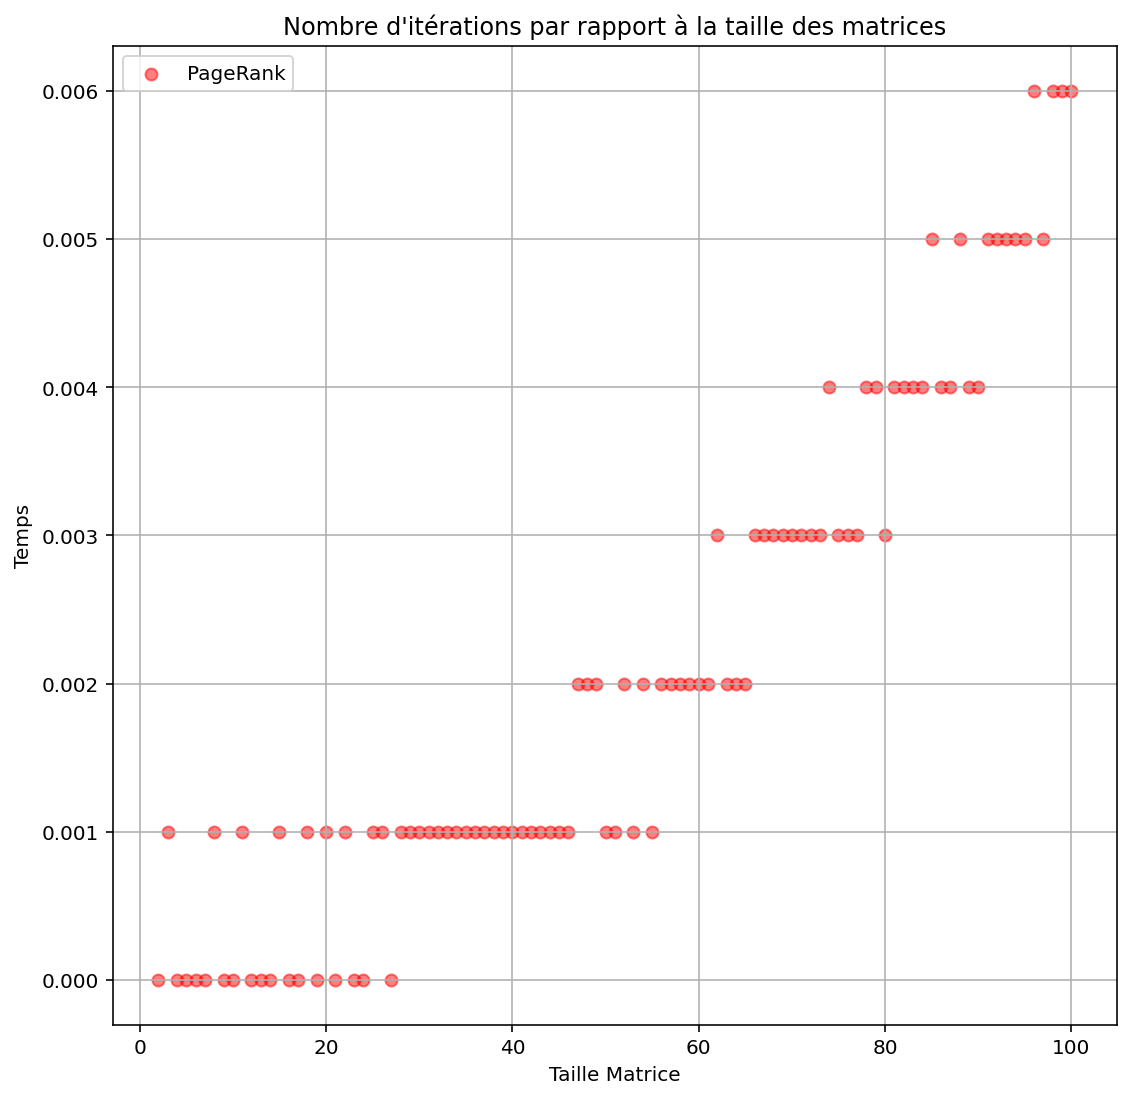

In [11]:
temps(np.arange(2,101));

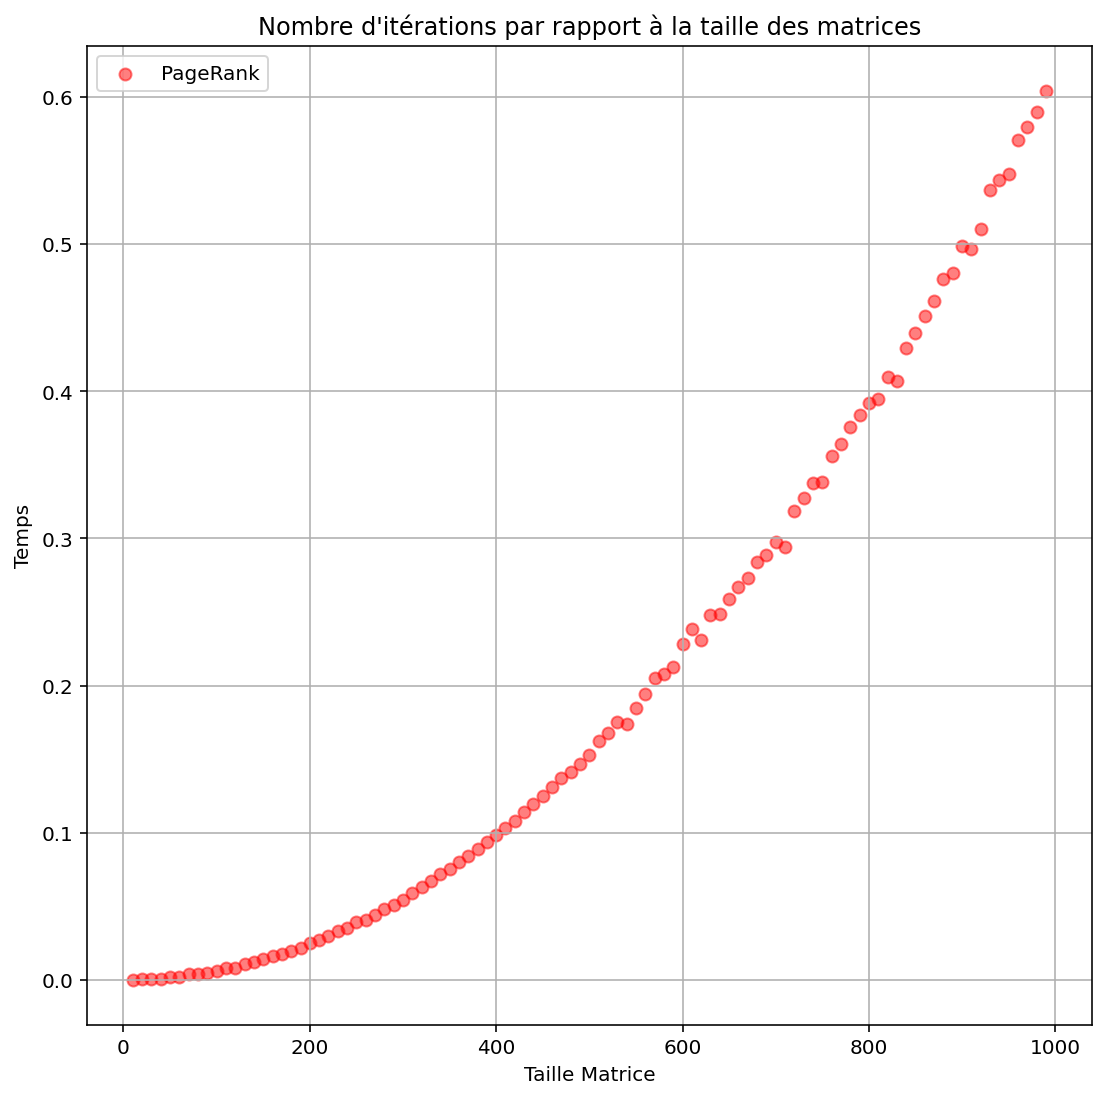

In [65]:
temps(np.arange(10,1000,10));

# Fonction de comparaison d'itérations

Nous définissons la fonction `temps_comparaison()`, qui pourra construire des graphes de comparaison des deux fonctions/algorithmes précédemment définis en ce qui concerne le temps d'éxecution de chacun d'entre eux par rapport à la taille des matrices données.

In [12]:
def temps_comparaison(x, f = lambda : random(), affichage = True, alpha = 0.85):
    '''
    Compare le temps que prendre l'algo 
    PageRank avec celui de puissance sur 
    des matrices aléatoires de
    taille i pour tout i dans l'array x
    
    @input:
    x -- numpy.array(int) : la liste des tailles matrices
    a evaluer
    f -- fonction void-->float : la fonction aléatoire
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    y1 -- numpy.array(int) : y1[i] = temps
    pour une matrice de taille x[i] avec PageRank
    y2 -- numpy.array(int) : y2[i] = temps
    pour une matrice de taille x[i] avec l'aglo de la Puissance
    
    print : matplotlib.figure -- Graphique
    '''
    
    y1, y2 = np.zeros(len(x)),np.zeros(len(x))
    for i, n in enumerate(x):
        if n <= 0:
            raise ValueError(f"Taille de matrice := {n} invalide")
        C = generate_matrix(n, f)
        t1 = time()
        _, _, _ = PageRank(C, alpha = alpha)
        t2 = time()
        _, _, _ = AlgorithmePuissance(C, alpha = alpha)
        t3 = time()
        y1[i] = t2 - t1
        y2[i] = t3 - t2
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, y1, color = 'red', label='PageRank', alpha = 0.5)
        ax.scatter(x, y2, color = 'blue', label='Puissance', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Temps par rapport à la taille des matrices")
        ax.set_xlabel('Taille Matrice')
        ax.set_ylabel("Temps")
        ax.legend()
    return y1,y2

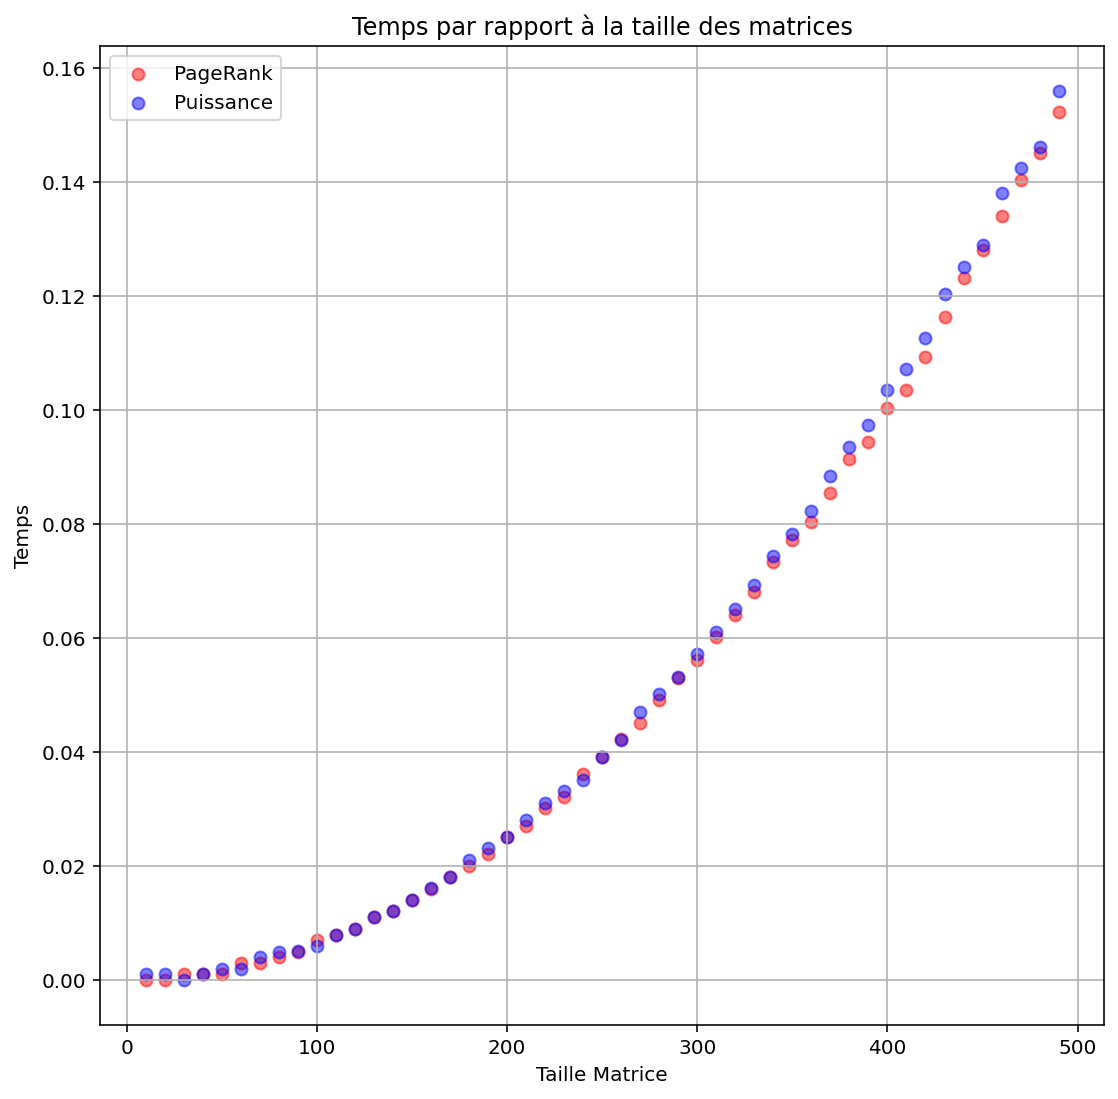

In [67]:
temps_comparaison(np.arange(10,500,10));

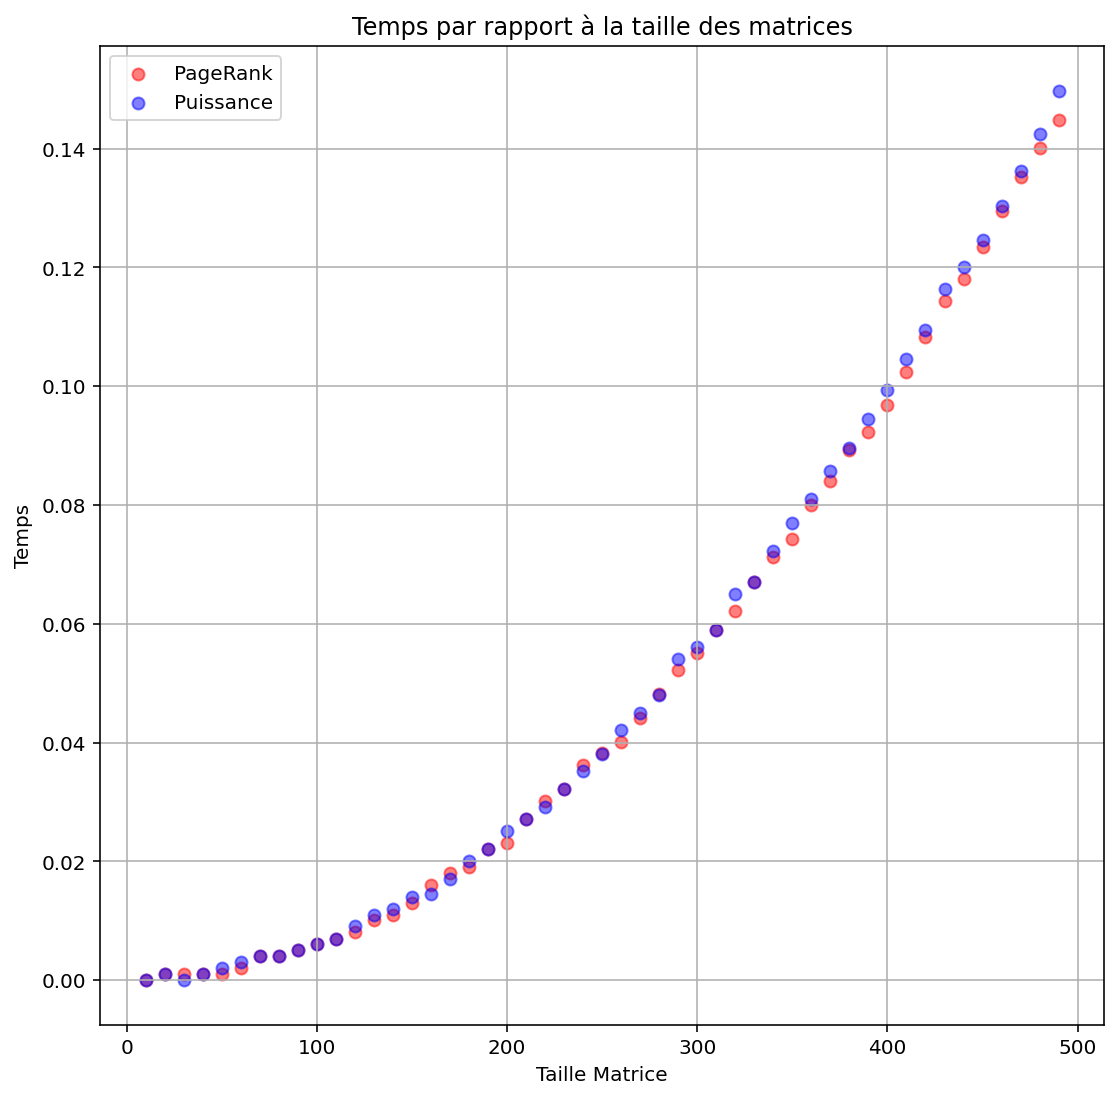

In [68]:
temps_comparaison(np.arange(10,500,10), f = lambda :random()*50 > 49);

# Fonction de remplissage

Ici, nous définissons la fonction `remplissage()`, qui compare le temps de remplissage pour différentes tailles de matrices.

In [69]:
def remplissage(n, x, Pagerank = True, affichage = True, alpha = 0.85):
    '''
    Compare le temps que prendre l'algo 
    PageRank/Puissance une matrice aléatoires
    de taille n avec un taux de remplissage de
    1/i pour tout i dans x
    
    @input:
    n -- int : taille de la matrice
    x -- numpy.array(int) : la liste des taux de 
    remplissage des matrices a evaluer
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    t -- numpy.array(int) : y1[i] = temps
    pour une matrice de taille n avec un taux de remplissage de 
    1/(x[i])
    print : matplotlib.figure -- Graphique
    
    '''
    t = np.zeros(len(x))
    for i, j in enumerate(x):
        t[i] = temps([n],Pagerank = PageRank, f = lambda: random()*j>j-1, affichage = False, alpha = alpha);
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, t, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title(f"Temps par rapport au taux de remplissage d'une matrice de taille {n}")
        ax.set_xlabel("Taux de remplissage")
        ax.set_ylabel("temps")
        ax.legend()
    return t


On observe que plus les matrices sont creuses, plus l'algorithme est efficace.
En effet, on a pris par défaut une probabilité de 0.5 qu'une page i pointe vers une page j, i!=j. Cependant c'est loin de la réalité puisque l'écrasente majorité des pages pointent vers max 100 autres pages, ce qui représente une infine partie de la totalité des pages (qui est de l'ordre du milliard).
Dans la pratique, la matrice C de base est donc majoritairement remplie de 0, ce qui fait que les multiplications matrices vecteurs ne pas si longues que ca puisse paraitre;

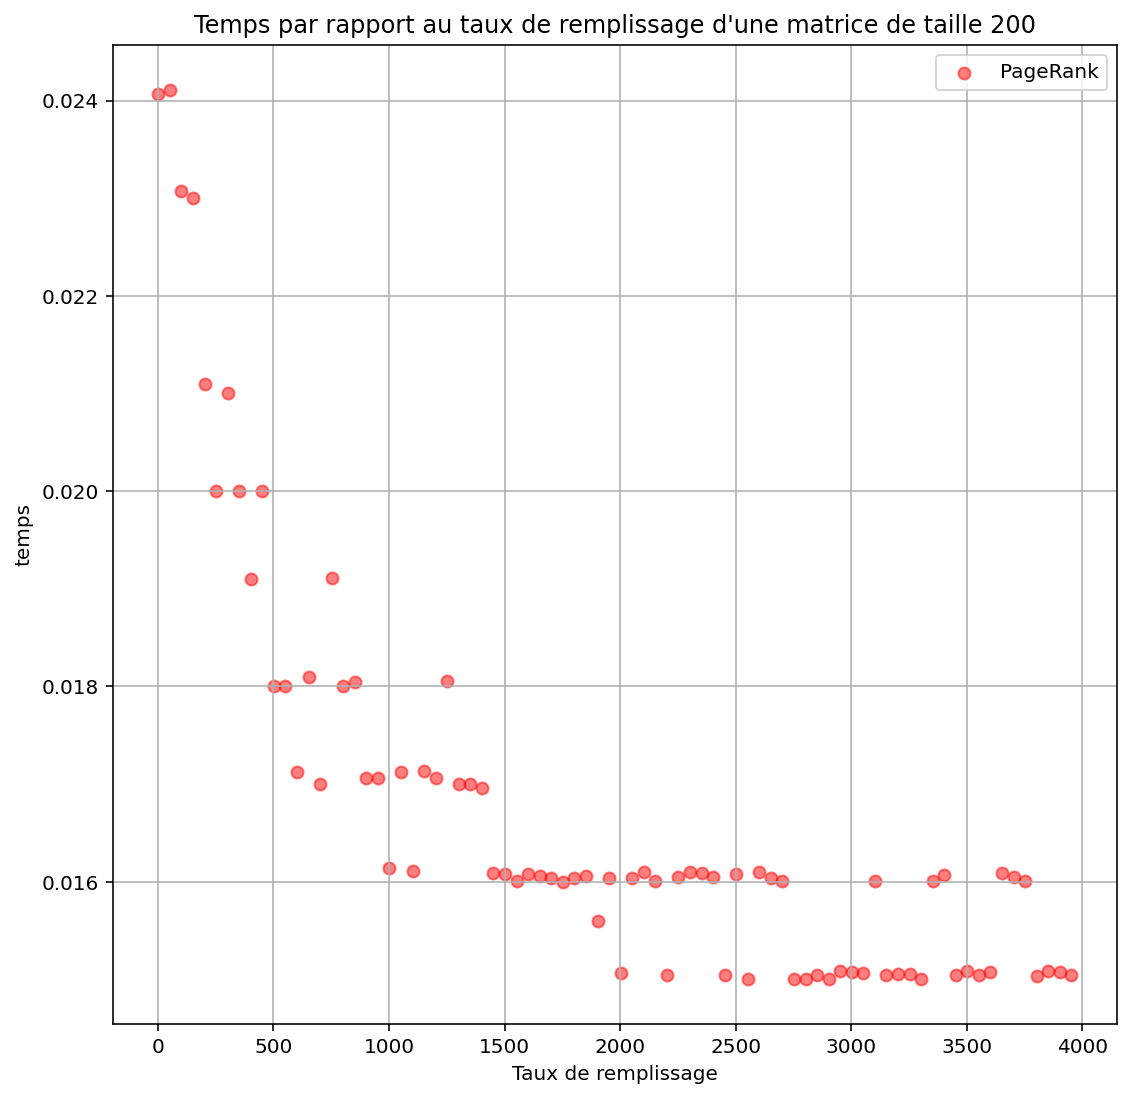

In [70]:
x = np.arange(2,4000,50)
remplissage(200, x);


# Fonction d'erreur

Ici, nous définissons la fonction `erreur()`, qui compare l'erreur de la solution donnée par les deux algorithme pour une taille de matrice donnée.

In [19]:
def erreur(n, f = lambda : random(), affichage = True, alpha = 0.85):
    '''
    Montre l'erreur des algo PageRank et Puissance à chaque 
    itérations sur des matrices aléatoires de taille n
    
    @input:
    n -- int : taille de la matrice
    f -- fonction void-->float : la fonction aléatoire
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    y1 -- numpy.array(int) : y1[i] = erreur de l'algo PageRank
    à la i-ème itération
    y2 -- numpy.array(int) : y2[i] = erreur de l'algo PageRank
    à la i-ème itération
    print : matplotlib.figure -- Graphique
    
    Comme on l'a vue précédemment, les deux algorithmes
    PageRank et Puissances sont équivalents à chaque itérations.
    Puisqu'ils mettent le même nombre d'itérations à trouver la 
    solution, on renvoie une erreur dans le cas contraire
    '''
    if n <= 0:
        raise ValueError(f"Taille de matrice := {n} invalide")
    C = generate_matrix(n, f)
    Q = matrice_Q(C)
    _, _, r1 = PageRank(C, alpha = alpha)
    _, _, r2 = AlgorithmePuissance(C, alpha = alpha)
    
    y1 = np.zeros(len(r1))
    y2 = np.zeros(len(r2))
    
    if len(y1) != len(y2):
        raise ValueError("Pas le même nombre d'itérations")
    
    for i, r in enumerate(r1):
        y1[i] = np.linalg.norm(Q@r - r)
    for i, r in enumerate(r2):
        y2[i] = np.linalg.norm(Q@r - r)
    x = np.arange(len(y1))
    
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, y1, color = 'red', label='PageRank', alpha = 0.5)
        ax.scatter(x, y2, color = 'blue', label='Puissance', alpha = 0.5)
        ax.grid(True)
        ax.set_title(f"Erreur de la solution à chaque itérations sur un matrice de taille {n}")
        ax.set_xlabel('Itérations')
        ax.set_ylabel("Erreur")
        ax.legend()
    return y1, y2


On voit que même à chaque itérations, les deux aglorithmes fournissent exactement
le même résultat

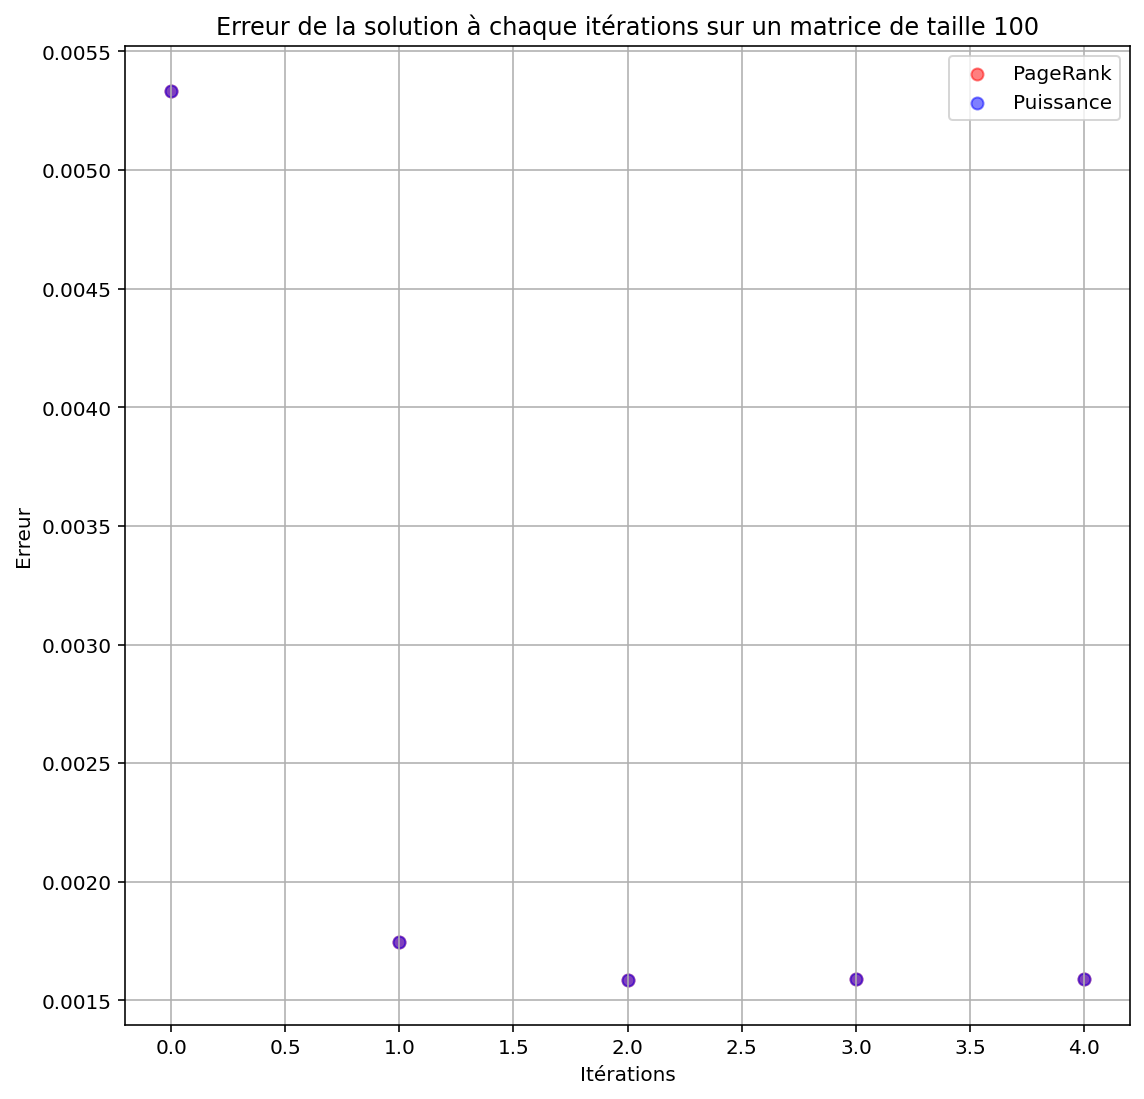

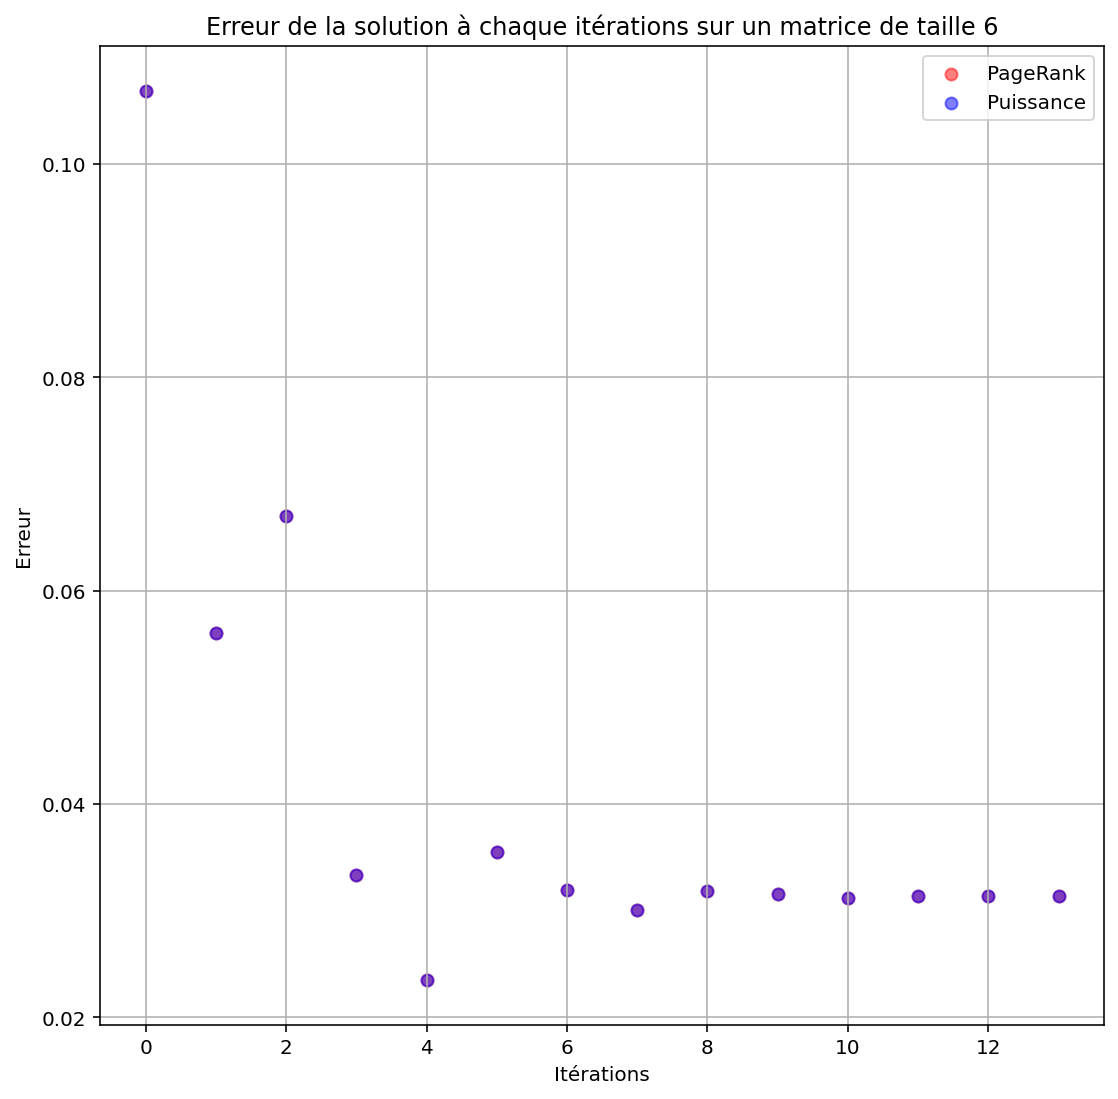

In [72]:
erreur(100);
erreur(6);


# Fonction d'erreur taille

Ici, nous définissons la fonction `erreur_taille()`, qui montre les erreurs de chaque algo sur différentes taille de matrice et qui permettra de comparer les deux algorithmes pour des tailles de matrices de plus en plus grandes.

In [16]:
def erreur_taille(x, PageRank = True, affichage = True, alpha = 0.85):
    '''
    Montre le temps que prendre l'algo 
    PageRank/Puissance sur des matrices aléatoires de
    taille i pour tout i dans l'array x
    
    @input:
    x -- numpy.array(int) : la liste des tailles matrices
    a evaluer
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    affichage -- boolean : affichage du graphique
    alpha -- float: compris entre 0 et 1 exclus (1-alpha = probabilité que l'internaute zappe sur une autre page)
    
    @output:
    erreur_finale -- numpy.array(int) : erreur_finale[i] = erreur
    pour une matrice de taille x[i] 
    
    print : matplotlib.figure -- Graphique
    '''
    erreur_finale = np.zeros(len(x))
    for i,j in enumerate(x):
        y1, y2 = erreur(j,affichage = False, alpha = alpha)
        if PageRank:
            erreur_finale[i] = y1[-1]
        else:
             erreur_finale[i] = y2[-1]
    if affichage:            
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(x, erreur_finale, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Erreur en fonction de la taille de la Matrice")
        ax.set_xlabel("Taille de la Matrice")
        ax.set_ylabel("Erreur")
    return erreur_finale

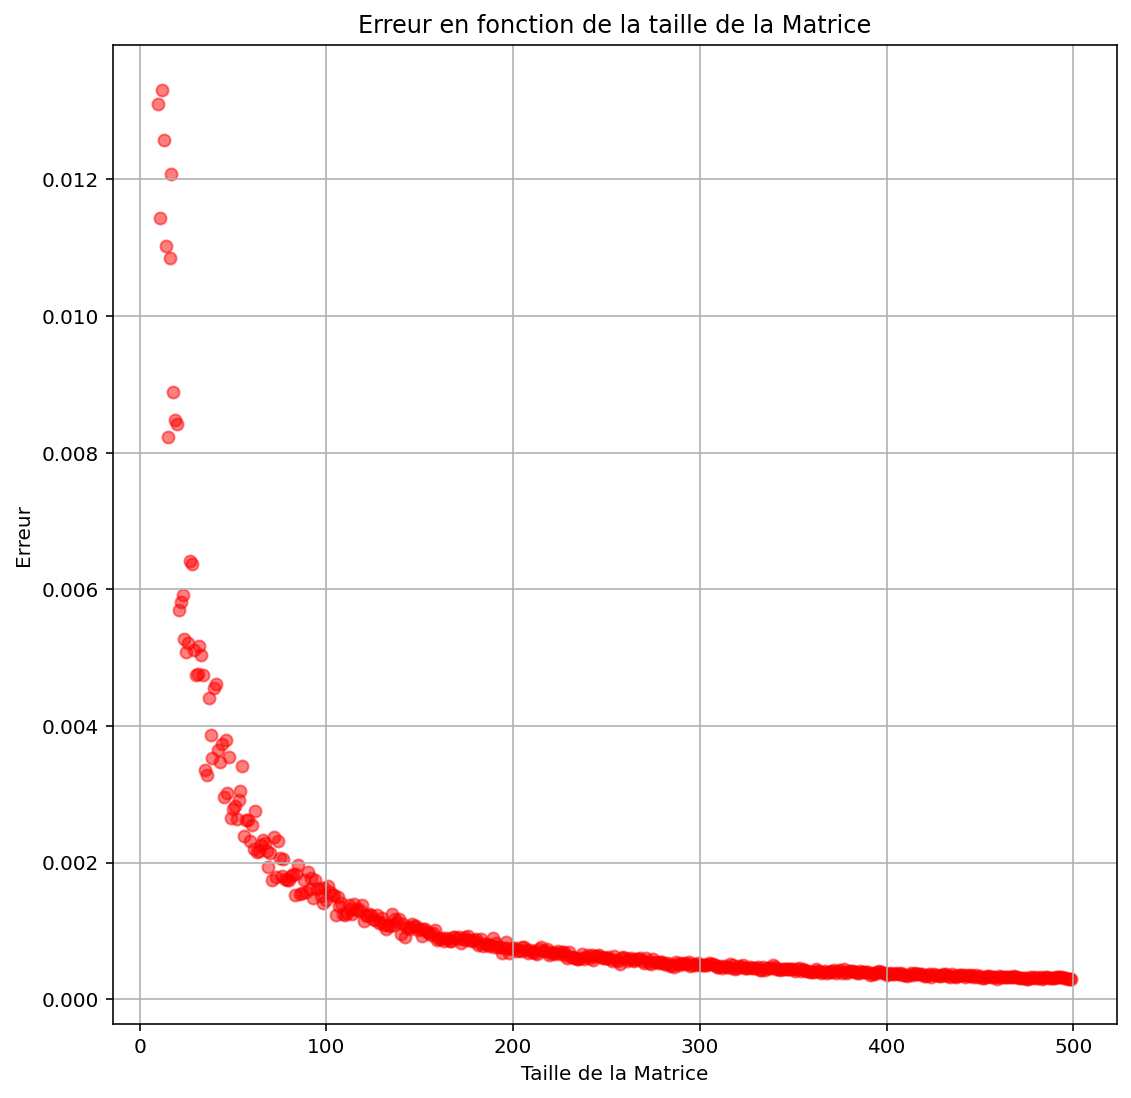

In [74]:
erreur_taille([j for j in range(10,500)]);

# Fonction de comparaison temps alpha

Ici, nous définissons la fonction `temps_alpha()`, qui compare le temps d'éxectutions pour différentes valeures de alpha données en paramétres.

In [30]:
def temps_alpha(n, a, PageRank = True, affichage = True, echelle = lambda x :x):
    '''
    Montre le temps que prendre l'algo 
    PageRank/Puissance sur des matrices de taille n
    avec les alpha dans le taleau a
    
    @input:
    n -- int : taille de la matrice
    a -- numpy.array(float) : la liste des alpha
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    affichage -- boolean : affichage du graphique
    echelle -- function numpy.array(float) -> numpy.array(float): changer
    l'échelle de l'abscisse du graphe. Utile pour avoir un graphe plus
    lisible si on travaille vers une limite (typiquement le comportement
    du graphe quand alpha tend vers 0 ou 1)
    
    @output:
    t -- numpy.array(float) : t[i] = temps de l'algo avec alpha = a[i]
    
    print : matplotlib.figure -- Graphique
    '''
    t = np.zeros(len(a))
    for i, alpha in enumerate(a):
        t[i] = temps([n], Pagerank = PageRank, affichage = False, alpha = alpha)[0]
    if affichage:            
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(echelle(a), t, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Temps en fonction du paramètre alpha")
        ax.set_xlabel("alpha")
        ax.set_ylabel("Temps")    
    return t


On observe que changer alpha n'a pas d'incidence sur le temps de l'algorithme

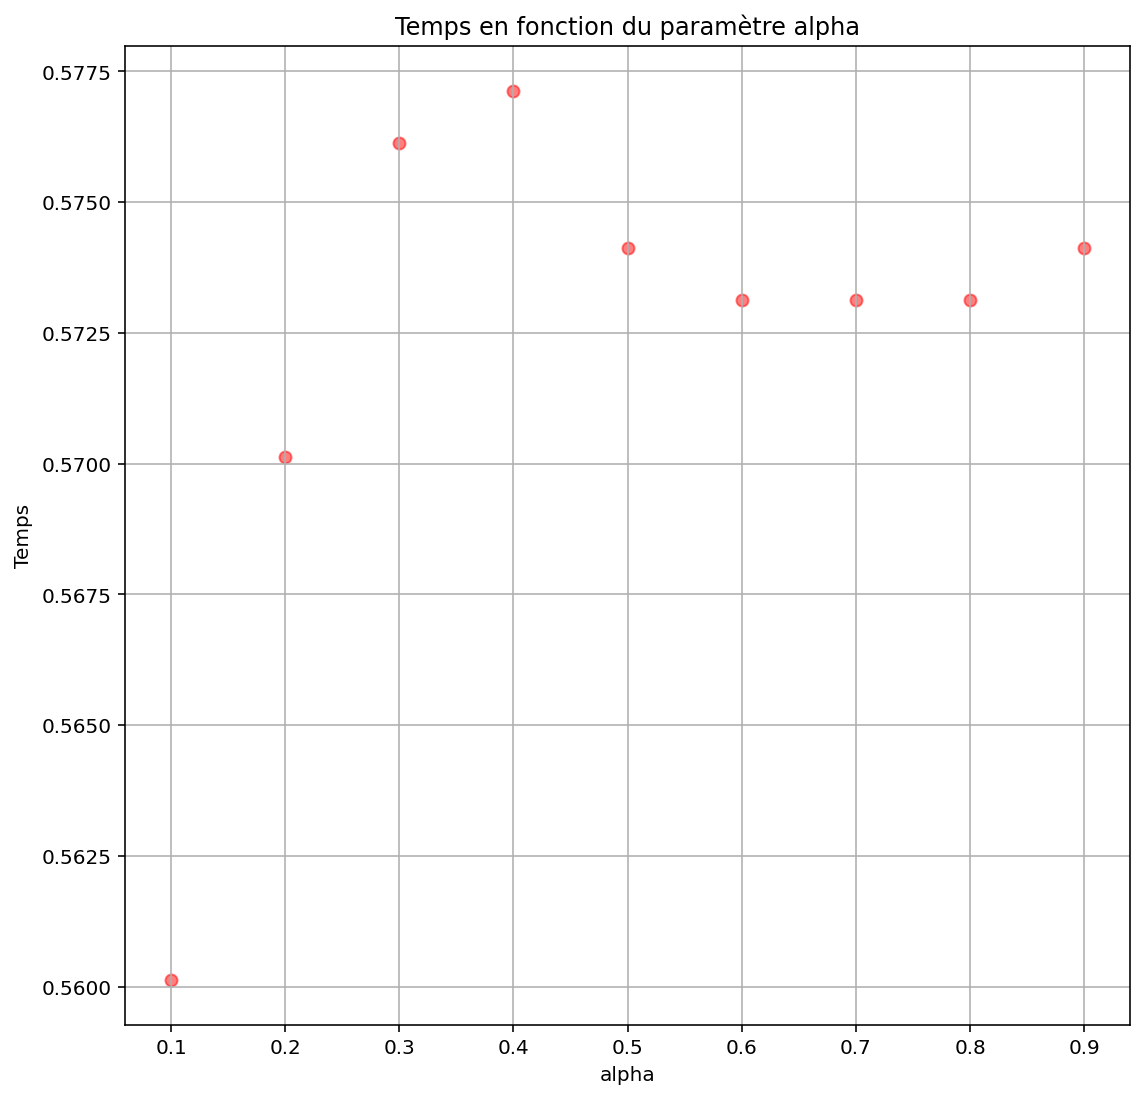

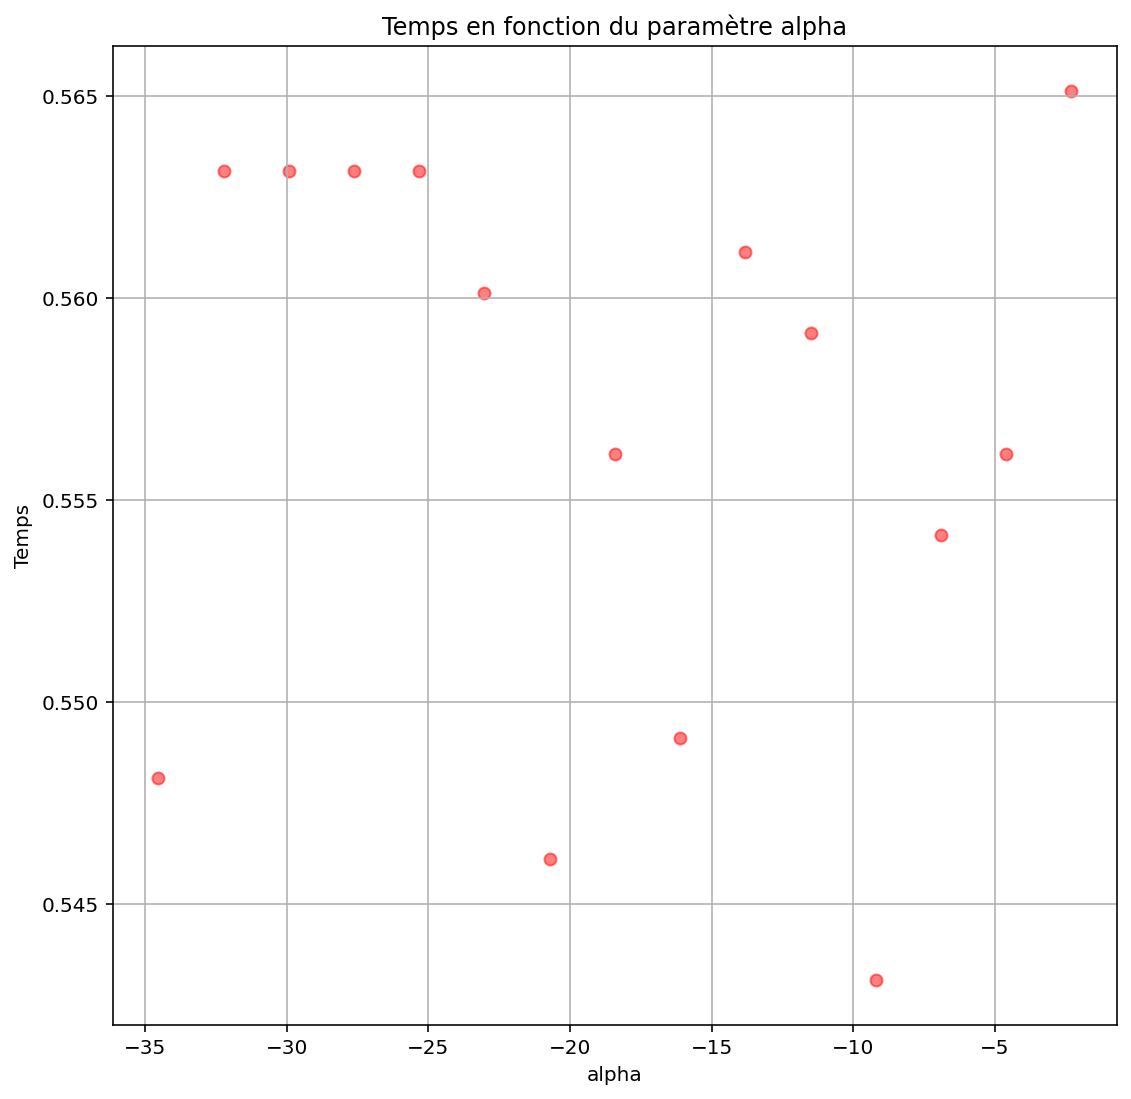

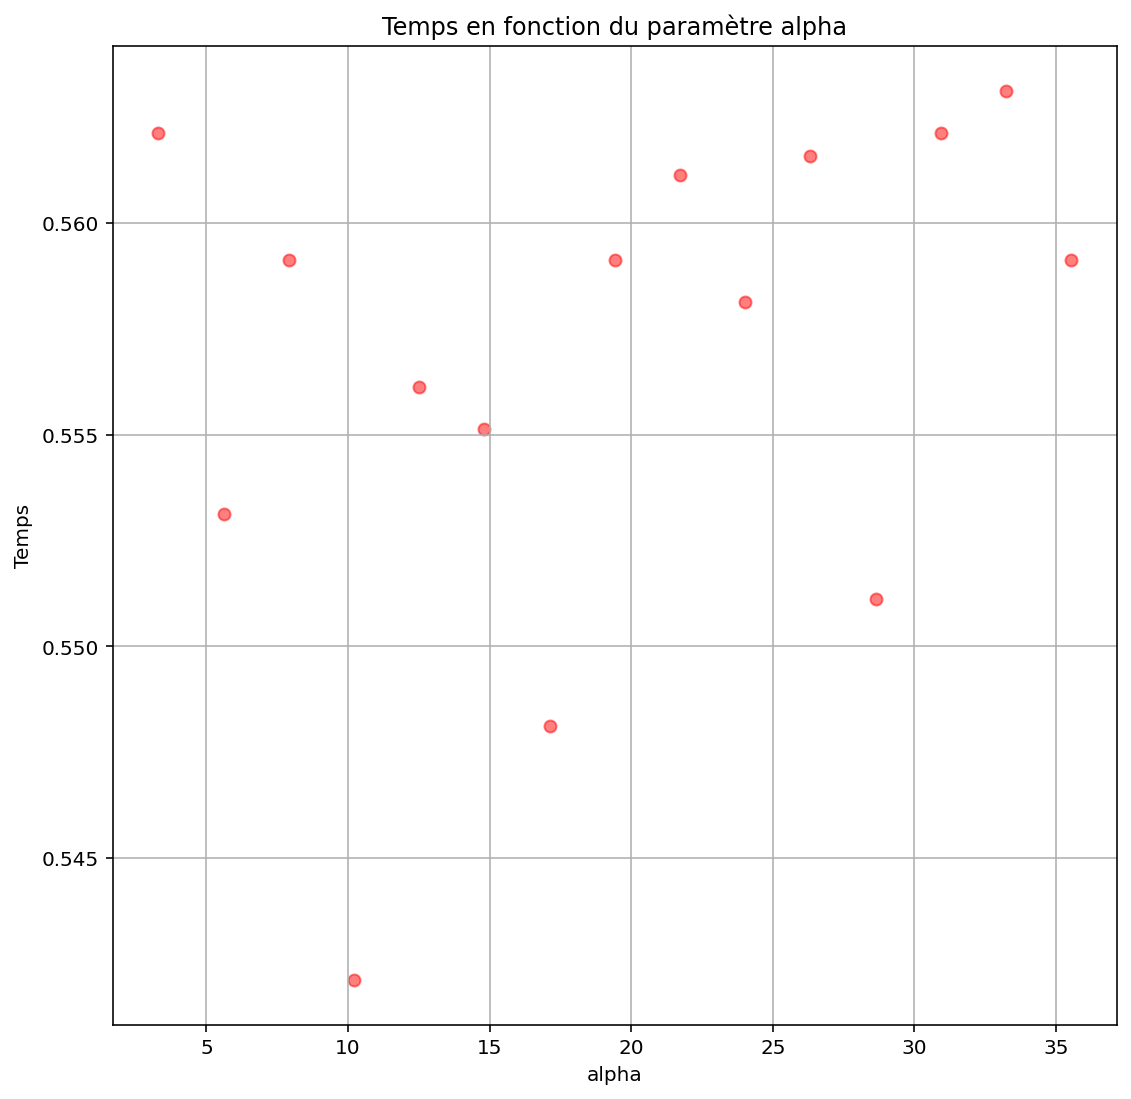

In [33]:
temps_alpha(1000, np.arange(0.1, 1, 0.1));
temps_alpha(1000, np.array([10**(-i) for i in range(1,16)]), echelle = lambda x : np.log(x));
temps_alpha(1000, np.array([(1-10**(-i)) for i in range(1,16)]), echelle = lambda x : 1 - np.log(1-x));


# Fonction de comparaisons iter alpha

Ici, nous définissons la fonction `iter_alpha()`, qui compare le nombre d'itérations pour differentes valeurs de alpha données.

In [25]:
def iter_alpha(n, a, PageRank = True, affichage = True, echelle = lambda x : x):
    '''
    Montre le nombre d'itérations que prendre l'algo 
    PageRank/Puissance sur des matrices de taille n
    avec les alpha dans le taleau a
    
    @input:
    n -- int : taille de la matrice
    a -- numpy.array(float) : la liste des alpha
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    affichage -- boolean : affichage du graphique
    echelle -- function numpy.array(float) -> numpy.array(float): changer
    l'échelle de l'abscisse du graphe. Utile pour avoir un graphe plus
    lisible si on travaille vers une limite (typiquement le comportement
    du graphe quand alpha tend vers 0 ou 1)
    
    @output:
    t -- numpy.array(float) : t[i] = nombre d'itérations de l'algo avec alpha = a[i]
    
    print : matplotlib.figure -- Graphique
    '''
    t = np.zeros(len(a))
    for i, alpha in enumerate(a):
        t[i] = iterations([n], Pagerank = PageRank, affichage = False, alpha = alpha)[0]
    if affichage:            
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(echelle(a), t, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Itérations en fonction du paramètre alpha")
        ax.set_xlabel("alpha")
        ax.set_ylabel("Itérations")    
    return t


On observe que plus alpha est petit, moins il y a d'itérations

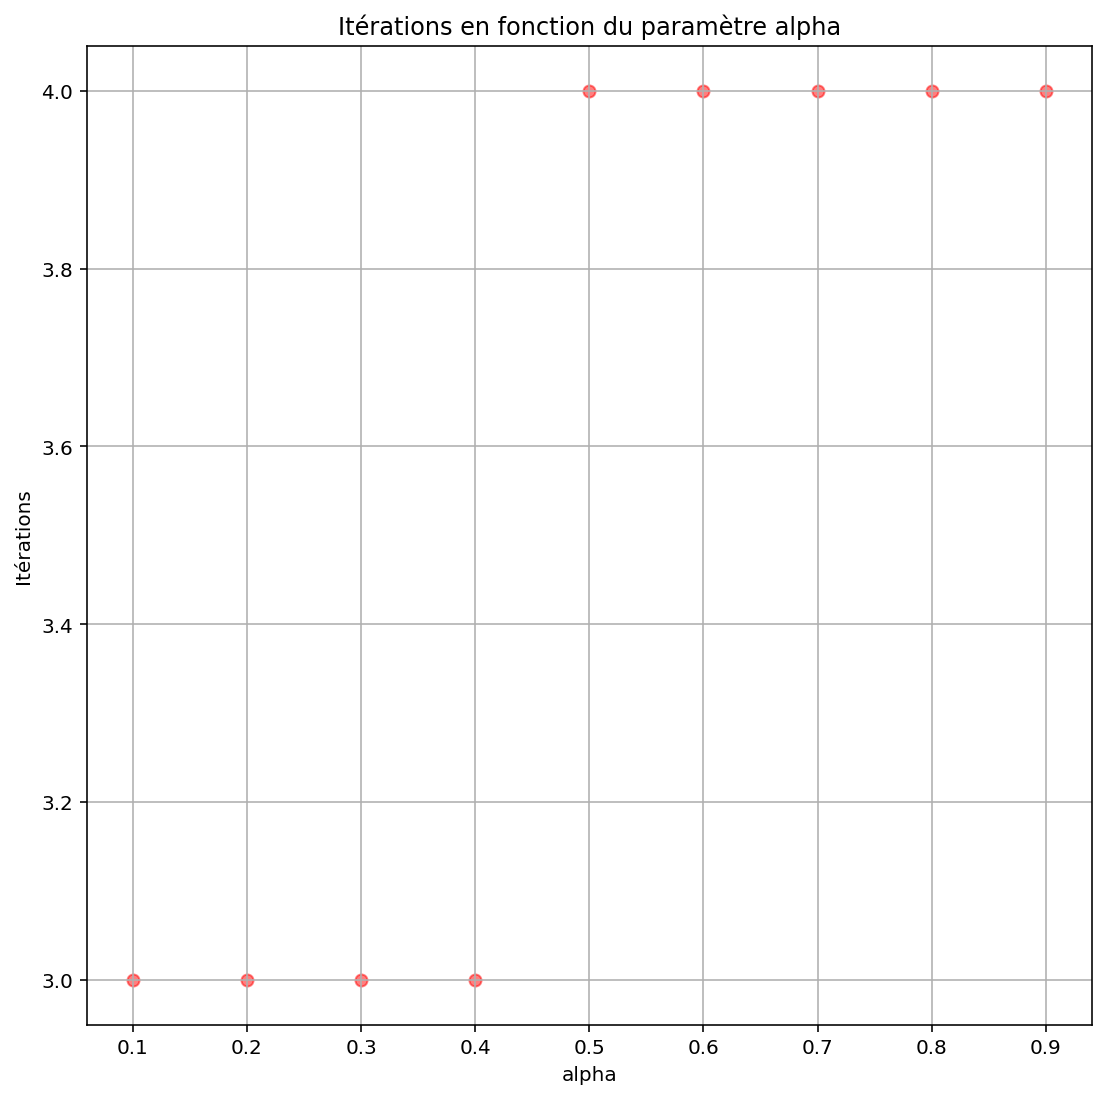

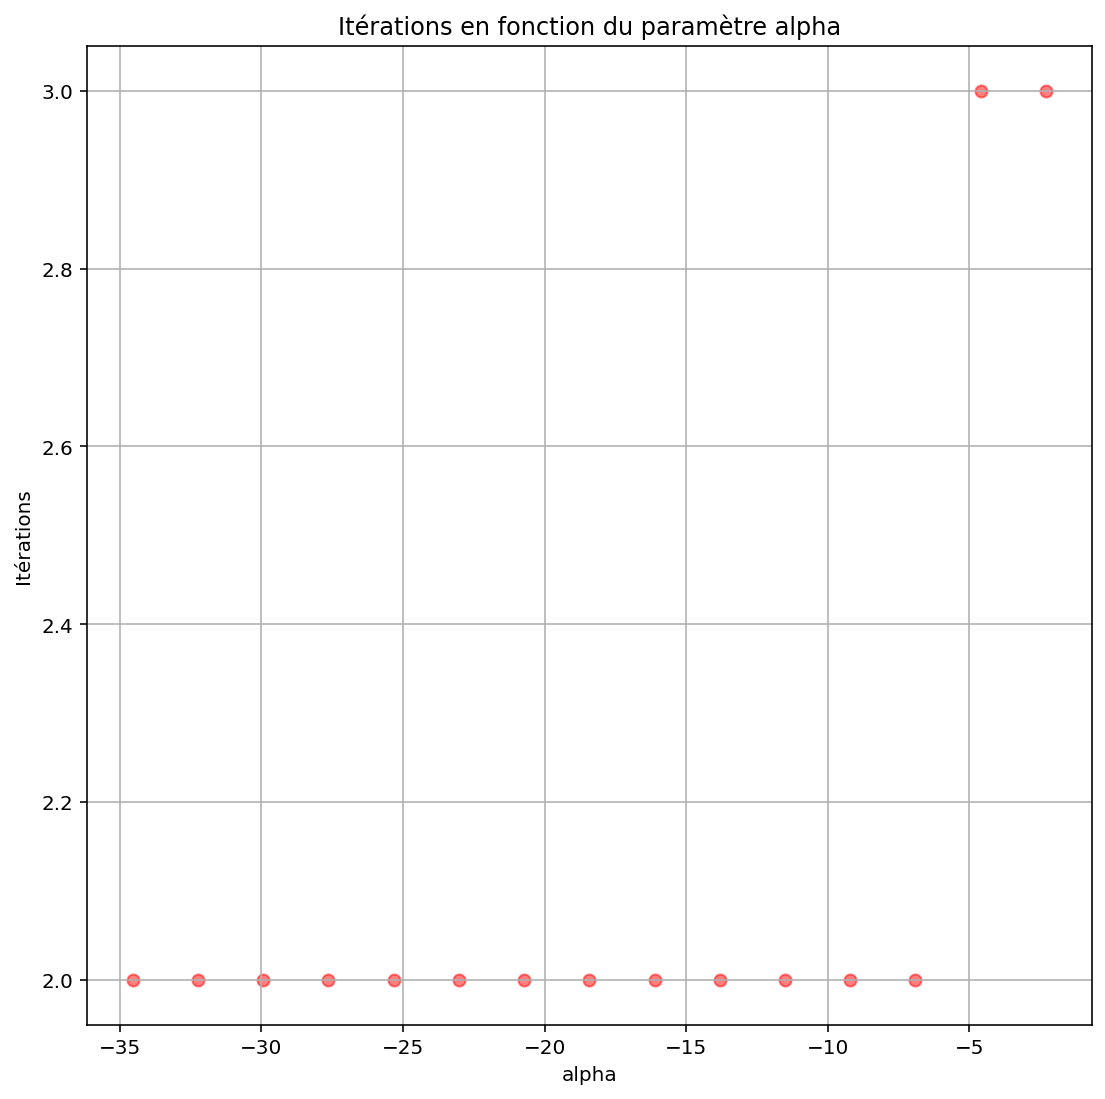

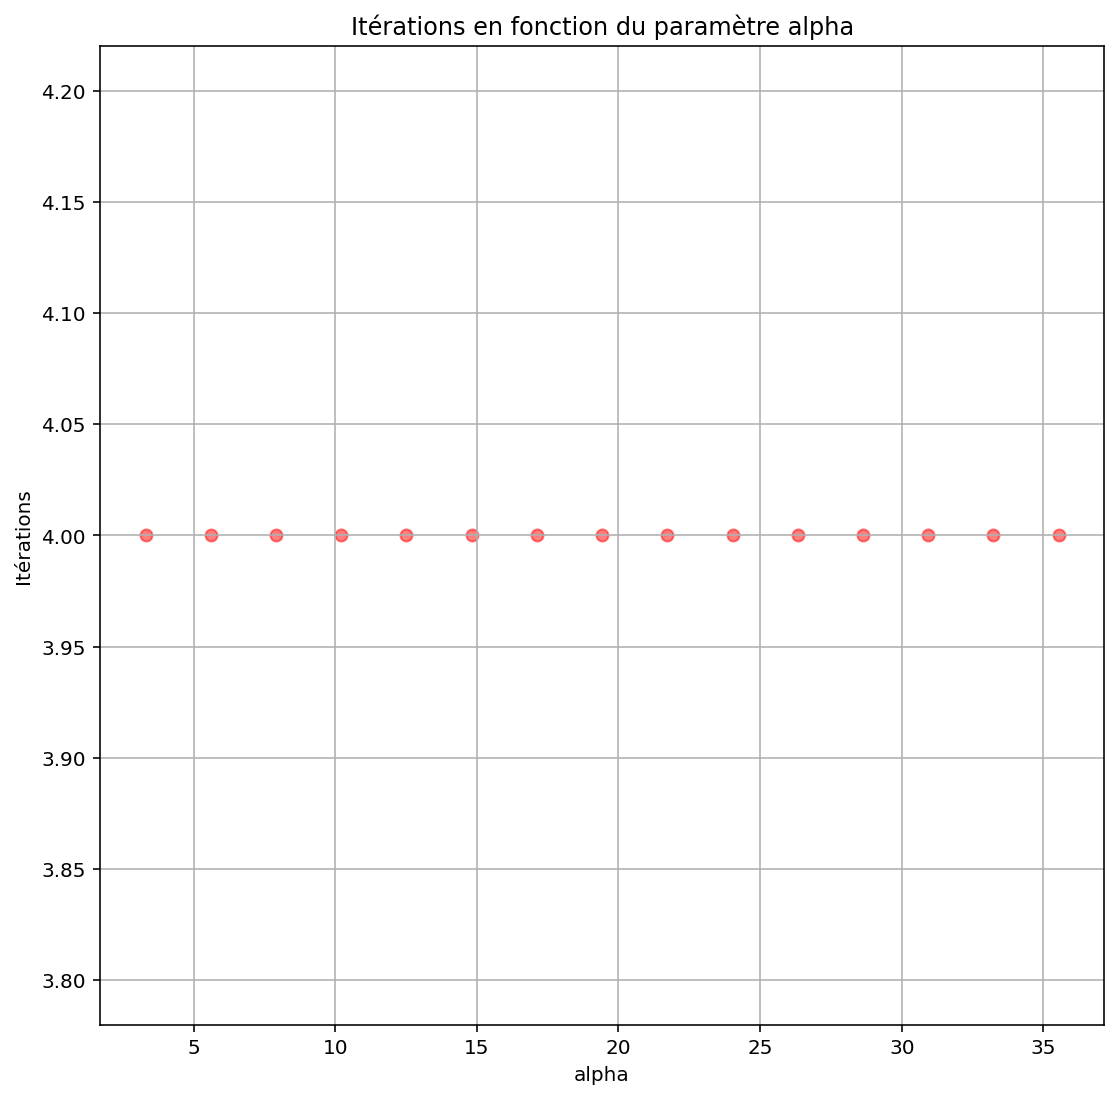

In [34]:
iter_alpha(1000, np.arange(0.1, 1, 0.1));
iter_alpha(1000, np.array([10**(-i) for i in range(1,16)]), echelle = lambda x : np.log(x));
iter_alpha(1000, np.array([(1-10**(-i)) for i in range(1,16)]), echelle = lambda x : 1-np.log(1-x));


# Fonction de comparaison d'erreurs pour différentes valeurs de alpha

Ici, nous définissons la fonction `erreur_alpha()`, qui compare l'erreur pour differentes valeurs d'alpha.

In [36]:
def erreur_alpha(n, a, Pagerank = True, affichage = True, echelle = lambda x : x):
    '''
    Montre l'erreur de l'algo 
    PageRank/Puissance sur des matrices de taille n
    avec les alpha dans le taleau a
    
    @input:
    n -- int : taille de la matrice
    a -- numpy.array(float) : la liste des alpha
    PageRank -- boolean : true-> PageRank | false-> Algo Puissance
    affichage -- boolean : affichage du graphique
    echelle -- function numpy.array(float) -> numpy.array(float): changer
    l'échelle de l'abscisse du graphe. Utile pour avoir un graphe plus
    lisible si on travaille vers une limite (typiquement le comportement
    du graphe quand alpha tend vers 0 ou 1)
    
    @output:
    t -- numpy.array(float) : t[i] = erreurs de l'algo avec alpha = a[i]
    
    print : matplotlib.figure -- Graphique
    '''
    t = np.zeros(len(a))
    for i, alpha in enumerate(a):
        t[i] = erreur_taille([n], PageRank = PageRank, affichage = False, alpha = alpha)[0]
    if affichage:            
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(echelle(a), t, color = 'red', label='PageRank', alpha = 0.5)
        ax.grid(True)
        ax.set_title("Erreur en fonction du paramètre alpha")
        ax.set_xlabel("alpha")
        ax.set_ylabel("Erreur")    
    return t

On observe que plus alpha est grand, plus le résultat est précis
Quand alpha s'approche assez de 1, l'algorithme fini instantanement

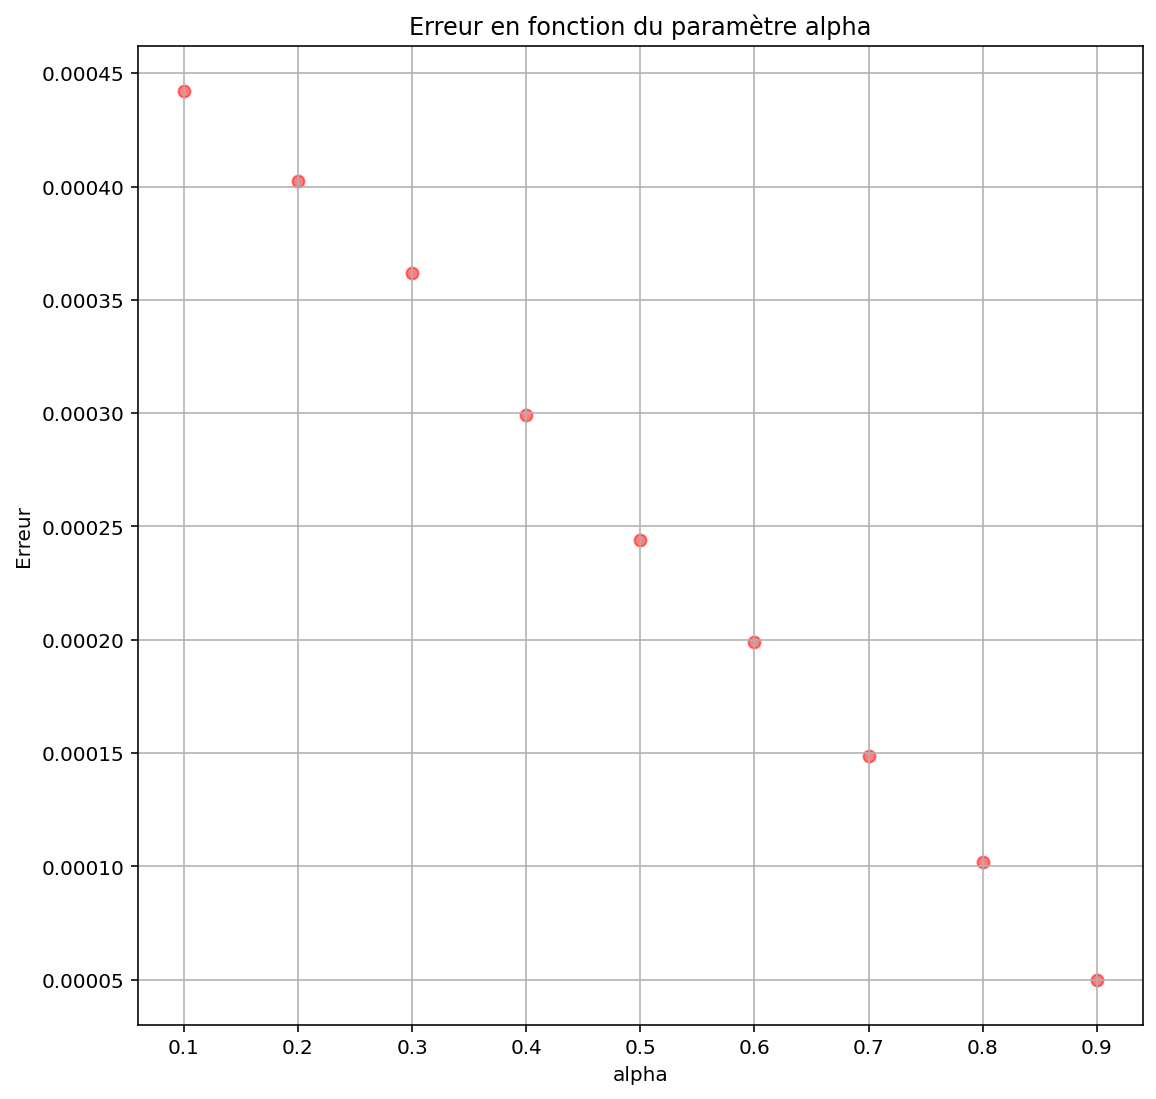

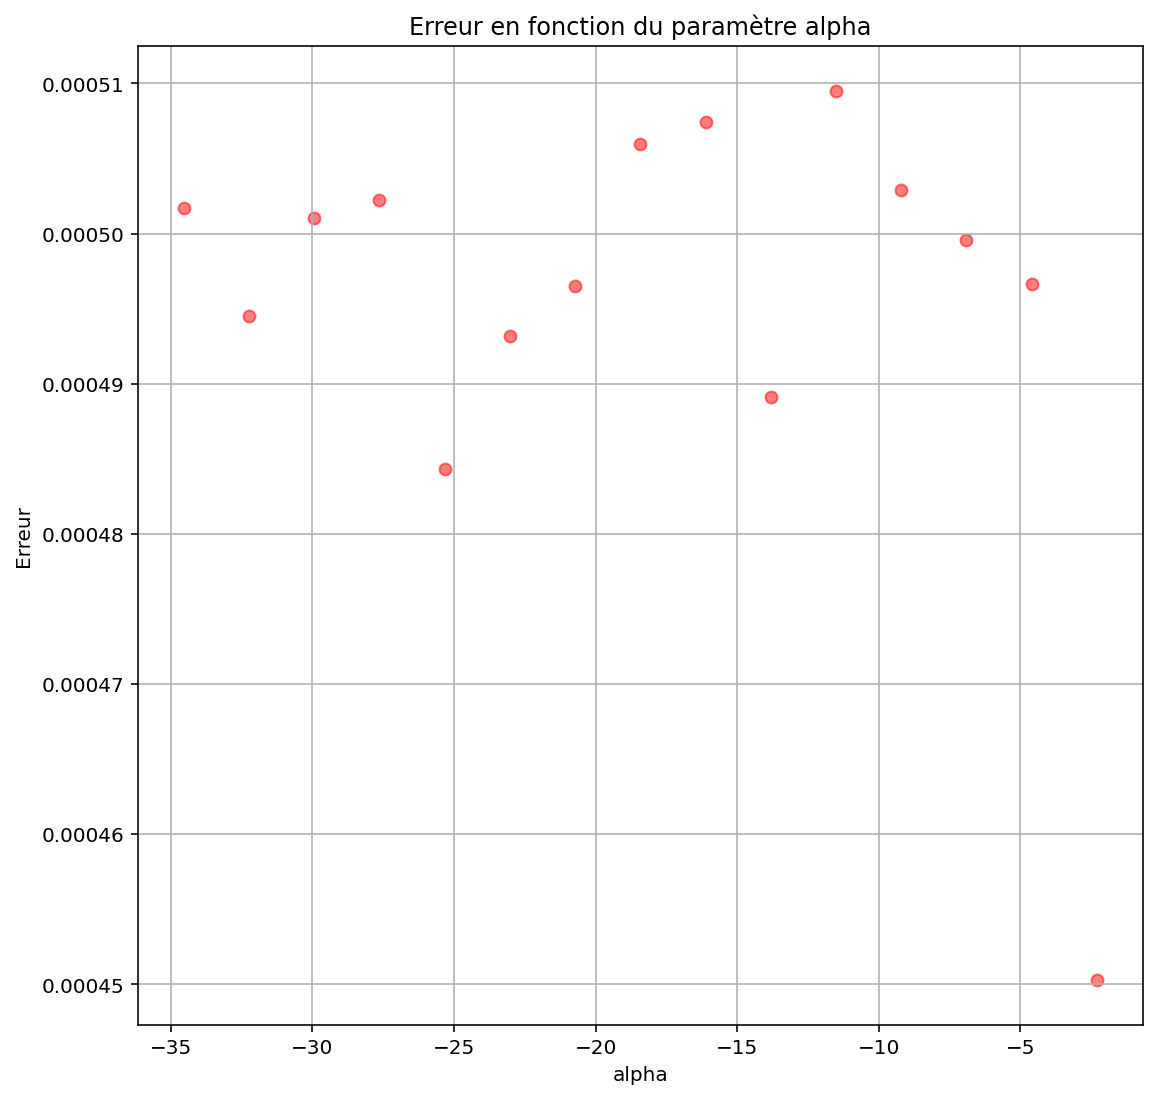

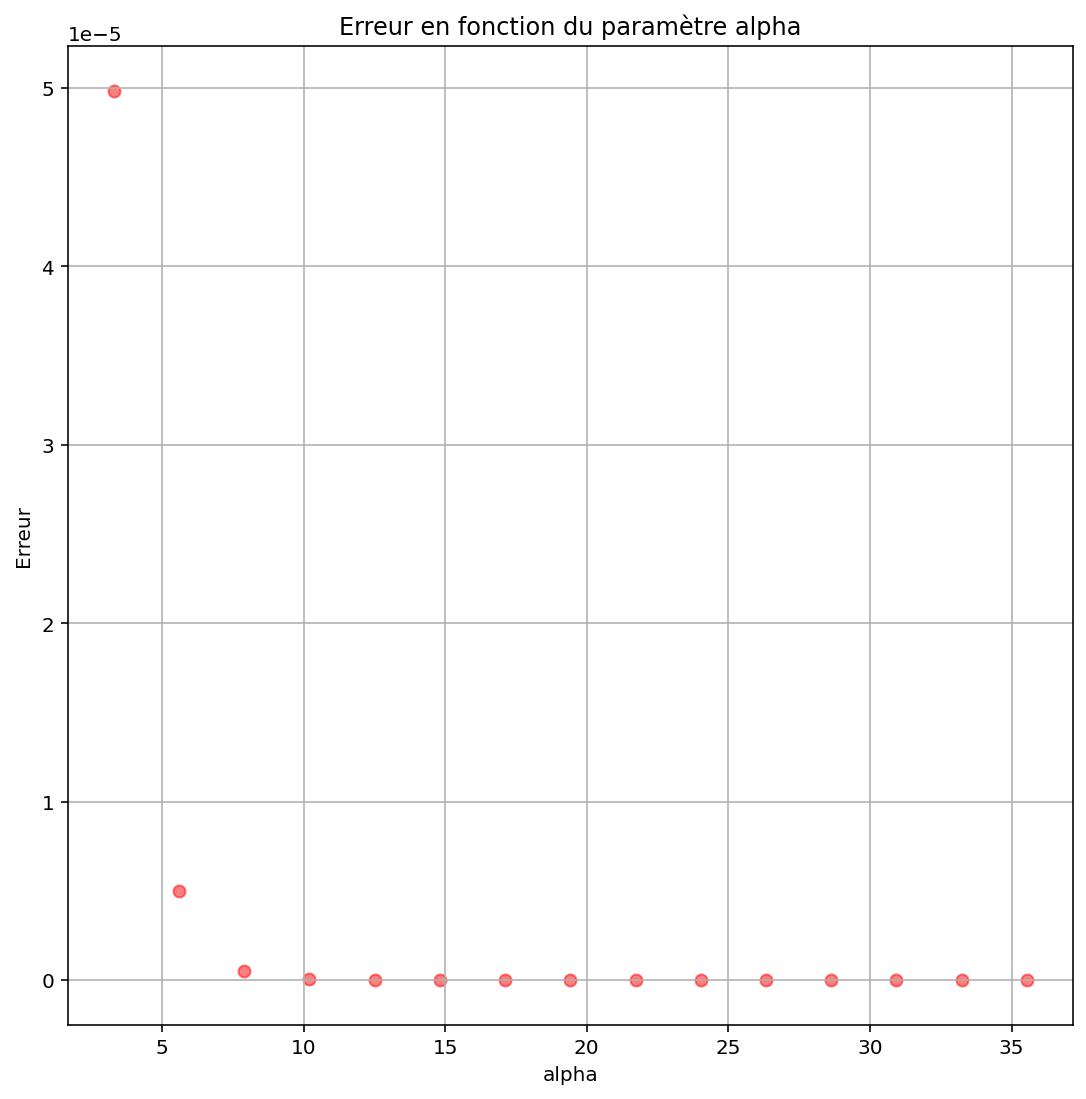

In [38]:
erreur_alpha(2000, np.arange(0.1, 1, 0.1));
erreur_alpha(2000, np.array([10**(-i) for i in range(1,16)]), echelle = lambda x : np.log(x));
erreur_alpha(2000, np.array([(1-10**(-i)) for i in range(1,16)]), echelle = lambda x : 1-np.log(1-x));


# Fonction de comparaisons du temps d'éxecution

Ici, nous définissons la fonction `difference_temps()`, qui compare la vitesse d'éxecution entre les deux algorithmes pagerank et puissance.

In [40]:
def difference_temps(x, affichage = True):
    '''
    Montre quel algorithme entre PageRank et
    Puissance est le plus rapide sur des matrices de taille n
    pour tout n dans le tableau x
    
    @input:
    x -- numpy.array(int) : la liste des tailles des matrices
    affichage -- boolean : affichage du graphique
    
    @output:
    d -- numpy.array(float) :
        -si d[i] > 0 alors PageRank est d[i]% plus rapide que Puissance
        pour une matrice de taille x[i]
        -si d[i] < 0 alors Puissance est d[i]% plus rapide que PageRank
        pour une matrice de taille x[i]
    r -- float: 
        -si r > 0 alors alors PageRank est r% plus rapide en moyenne que Puissance
        -si r < 0 alors alors Puissance est r% plus rapide en moyenne que PageRank
    print : matplotlib.figure -- Graphique
    '''
    d1 = np.zeros(len(x))
    d2 = np.zeros(len(x))
    
    for i, n in enumerate(x):
        t1, t2 = temps_comparaison([n], affichage = False)
        plusrapide = "PageRank"
        st1 = np.sum(t1)   
        st2 = np.sum(t2)
        if st1 >= st2:
            if st1 == 0:
                d1[i], d2[i] = 0, 0
            else:
                d1[i], d2[i] =  0, -(1-st2/st1)*100
        else:
            if st2 == 0:
                d1[i], d2[i] = 0, 0
            else:
                d1[i], d2[i] =  (1-st1/st2)*100, 0
        
    b1 = x * (d1 > 0)
    b2 = x * (d2 < 0)
    b3 = x * (d1 == 0) * (d2 == 0)
    d = b1 + b2
    
    b1, b2, b3 = b1[b1 != 0], b2[b2 != 0], b3[b3 != 0]
    d1, d2 = d1[d1 != 0], d2[d2 != 0]
    
    if affichage:
        fig = plt.figure(figsize=(9,9))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(b1, d1, color = 'red', label = "Pagerank")
        ax.scatter(b2, d2, color = 'blue', label = "Puissance")
        if len(b3) > 0:
            ax.scatter(b3, np.zeros(len(b3)), color = 'black', label = "Pareil")
        ax.grid(True)
        ax.set_xlabel("Taille de la Matrice")
        ax.set_ylabel("% d'efficacité")
        ax.legend()
        r = (np.sum(d1) + np.sum(d2))/len(x)
        title = ""
        if r >= 0:
            title = f"PageRank plus rapide en moyenne de {r:5.3f}%"
        else:
            title = f"Puissance plus rapide en moyenne de {-r:5.3f}%"
        ax.set_title(title)
    return d, r

 Avec des matrices grandes, on voit que PageRank est régulièrement
 un peu plus rapide que l'algo Puissance (2.5% en moyenne)
 C'est donc peut-être une des raisons qui a poussé Google
 à utiliser PageRank à la place de Puissance. Sur des matrices
 immenses, peut-etrte que la différance est encore plus grande
 ou que 2% représente déjà une marge conséquente à cette échelle.
 Malheuresement, on ne dispose pas de la puissance de calcul
 nécessaire pour tester cela

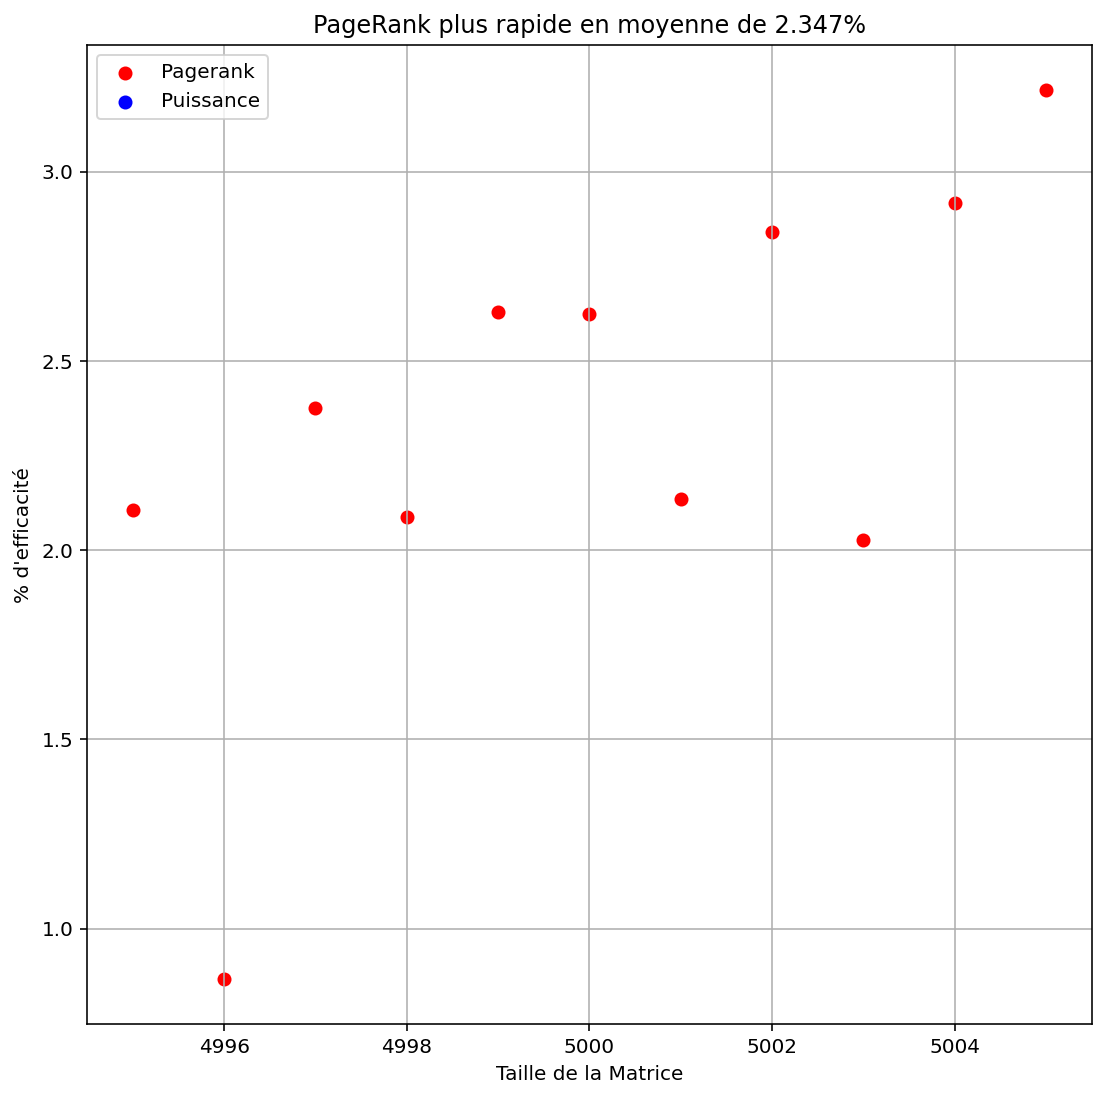

In [41]:
difference_temps([5000 + i for i in np.arange(-5, 6, 1)]);